<a href="https://colab.research.google.com/github/HakimKamari/Aircraft-Noise-Complaint-Analytics-A-Data-Driven-Approach/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation

In [70]:
pip install geopandas

In [71]:
# installing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
import descartes 
import seaborn as sns
from shapely.geometry import Point, Polygon
%matplotlib inline

#import pyproj
#from pandas.testing import assert_frame_equal

#Air Traffic Seasonality 

**Description:** 

First, we will have a look at the total complaints YoY,

Next, for assessment of air traffic seasonality, we would want to first look at some trends between aircraft noise complaints filed and air traffic statistics for both the year 2013 and 2016.


## Total Complaints YoY

In [72]:
# importing the csv into google colab
df = pd.read_csv('Aircraft_Noise_Complaint_Data_Updated.csv')
df.head(5) # showing the headers as well as the first 5 rows

,Year,Month,Date,Community,Total Complaints,Total Number of Callers
0,2005,1,Jan-05,Alameda,7.0,1.0
1,2005,1,Jan-05,Atherton,242.0,1.0
2,2005,1,Jan-05,Belmont,75.0,1.0
3,2005,1,Jan-05,Berkeley,8.0,1.0
4,2005,1,Jan-05,Brisbane,239.0,7.0


In [73]:
# I want the plot to show only years 2013 onwards 
df_total = df[(df['Year'] > 2012)]
df_total

,Year,Month,Date,Community,Total Complaints,Total Number of Callers
1559,2013,1,Jan-13,Atherton,8.0,2.0
1560,2013,1,Jan-13,Brisbane,23.0,5.0
1561,2013,1,Jan-13,Daly City,149.0,3.0
1562,2013,1,Jan-13,Foster City,1.0,1.0
1563,2013,1,Jan-13,Menlo Park,6.0,3.0
...,...,...,...,...,...,...
4744,2019,7,Jul-19,Sunnyvale,348.0,5.0
4745,2019,7,Jul-19,Union City,381.0,1.0
4746,2019,7,Jul-19,Watsonville,174.0,1.0
4747,2019,7,Jul-19,West Menlo Park,2.0,1.0


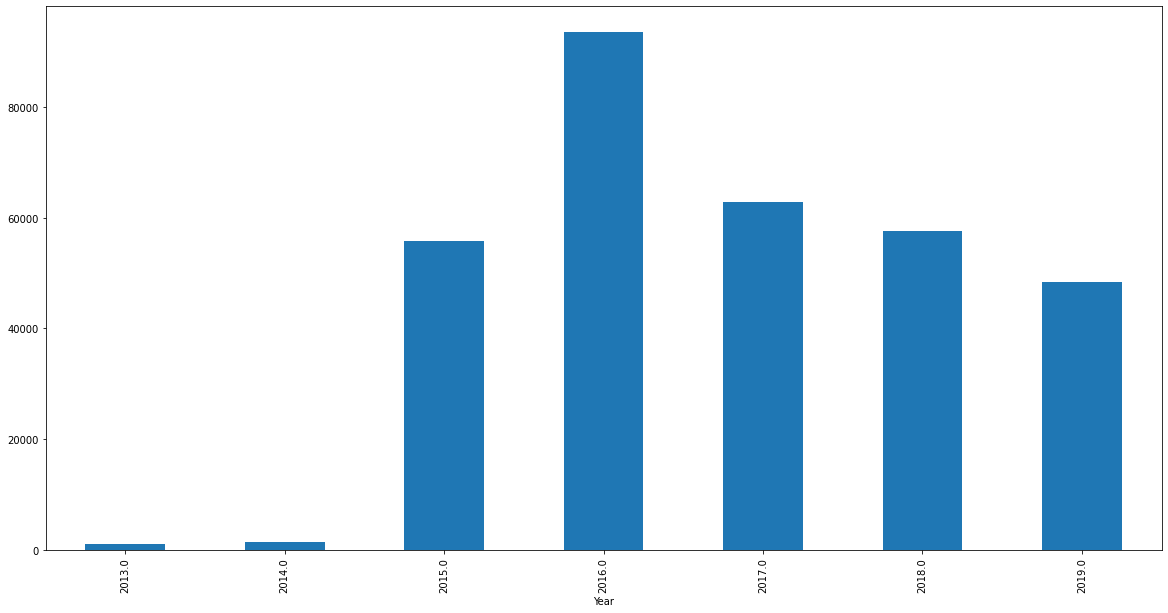

In [74]:
df.groupby(df_total['Year'])['Total Complaints'].max().plot(kind='bar', figsize=(20,10))

**Comment:**

There is a stark difference between 2013 and 2016 in that there is a sudden spike in noise complaints. This spike could be attributed to the FAA's decision to open up Next-Gen routes which will allow aircraft to pass by certain residential areas at a much lower altitudes. 

## Total Complaints MoM

Dataset used is the Aircraft Noise Complaint Data from SFO's noise abatement office

In [75]:
# selecting the specific year to be 2013 
df_2013 = df[(df['Year'] == 2013)]
df_2013

,Year,Month,Date,Community,Total Complaints,Total Number of Callers
1559,2013,1,Jan-13,Atherton,8.0,2.0
1560,2013,1,Jan-13,Brisbane,23.0,5.0
1561,2013,1,Jan-13,Daly City,149.0,3.0
1562,2013,1,Jan-13,Foster City,1.0,1.0
1563,2013,1,Jan-13,Menlo Park,6.0,3.0
...,...,...,...,...,...,...
1758,2013,12,Dec-13,San Leandro,1.0,1.0
1759,2013,12,Dec-13,San Mateo,2.0,1.0
1760,2013,12,Dec-13,San Ramon,1.0,1.0
1761,2013,12,Dec-13,South San Francisco,5.0,4.0


In [76]:
# selecting the specific year to be 2016
# this is for plotting stacked bar graph 
df_2016 = df[(df['Year'] == 2016)]
df_2016

,Year,Month,Date,Community,Total Complaints,Total Number of Callers
2396,2016,1,Jan-16,Alameda,5.0,3.0
2397,2016,1,Jan-16,Aptos,478.0,9.0
2398,2016,1,Jan-16,Atherton,147.0,1.0
2399,2016,1,Jan-16,Belmont,7.0,4.0
2400,2016,1,Jan-16,Belvedere-Tiburon,1.0,1.0
...,...,...,...,...,...,...
3003,2016,12,Dec-16,Scotts Valley,10931.0,104.0
3004,2016,12,Dec-16,Soquel,7406.0,101.0
3005,2016,12,Dec-16,Sunnyvale,3628.0,66.0
3006,2016,12,Dec-16,Union City,1.0,1.0


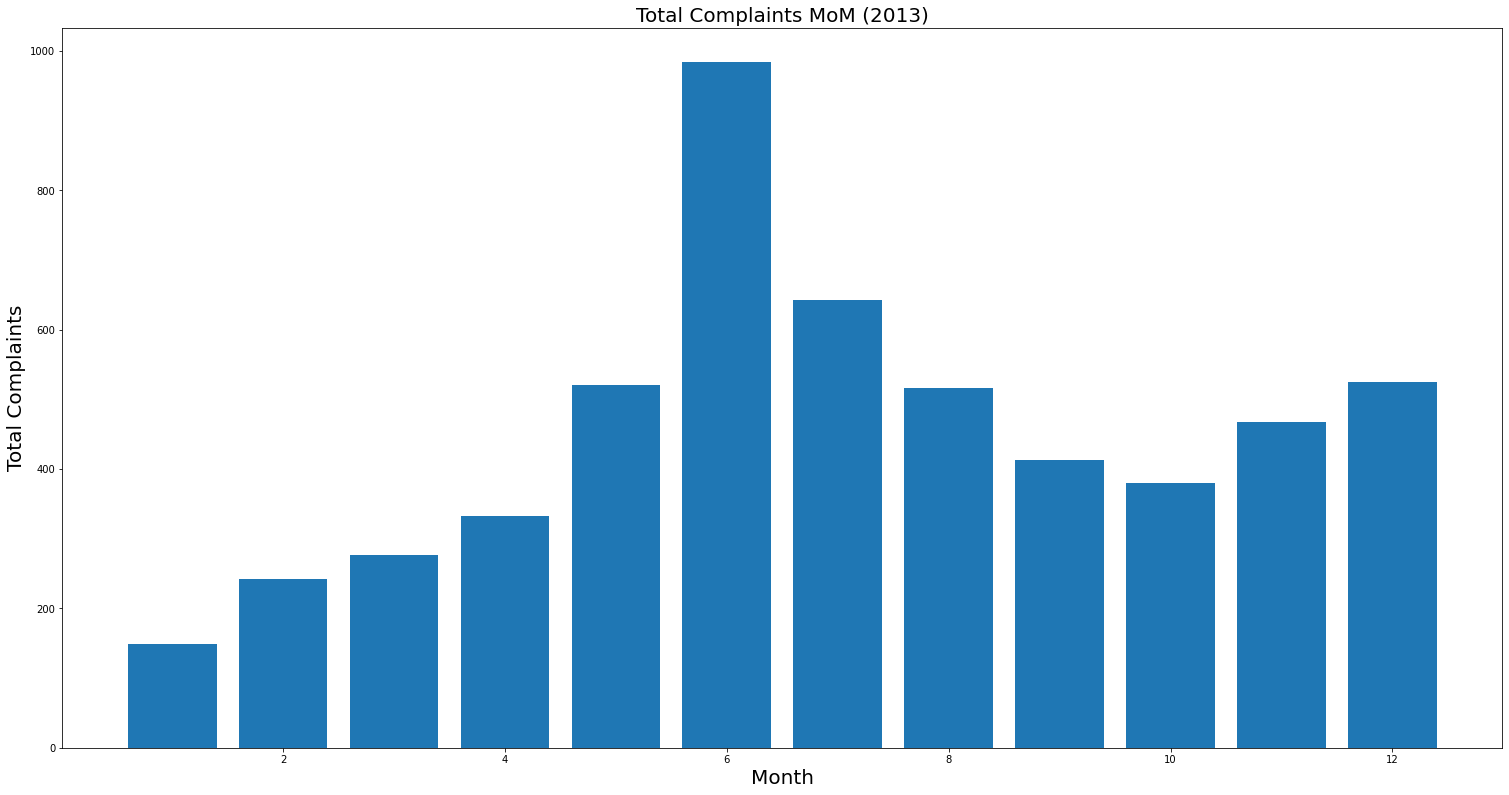

In [77]:
# how about we plot using matplotlib
# we basically want to plot Total Complaints against Month 

fig = plt.figure(figsize=(20,10)) # setting the size of the plot
ax = fig.add_axes([0,0,1,1]) #x-origin, y-origin, width, height
Month_2013 = df_2013['Month'] # assigning the values in Month to be the x-axis parameter
Total_Complaints_2013 = df_2013['Total Complaints'] # assigning the values in Total Complaints to be the y-axis parameter
ax.bar(Month_2013, Total_Complaints_2013) # x, y
plt.title('Total Complaints MoM (2013)', fontsize=20) # main title
plt.xlabel('Month', fontsize=20) # x-axis label
plt.ylabel('Total Complaints', fontsize=20) # y-axis label
plt.show()

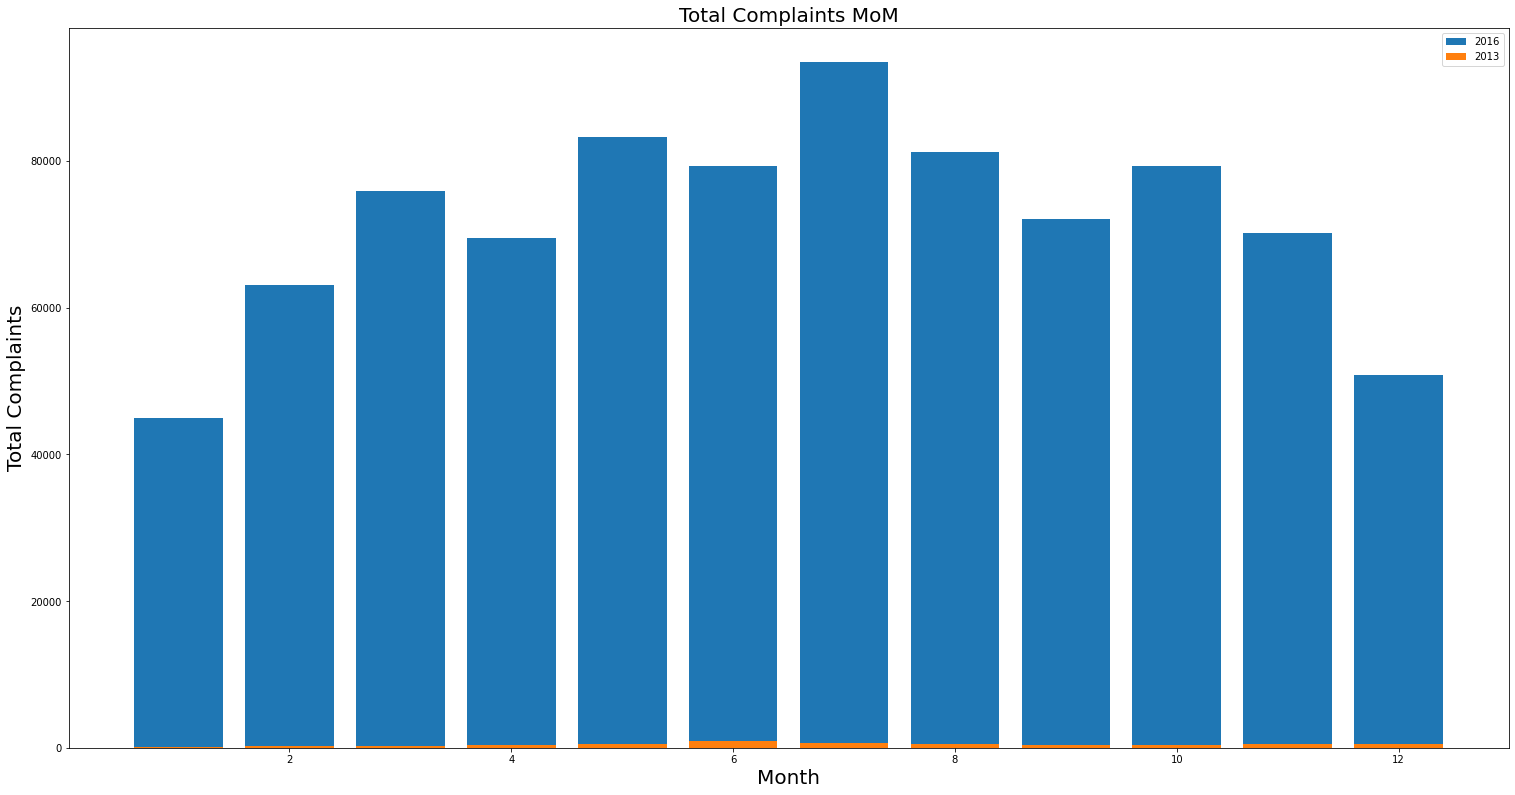

In [78]:
fig1 = plt.figure(figsize=(20,10)) # setting the size of the plot
ax = fig1.add_axes([0,0,1,1]) #x-origin, y-origin, width, height
Month = df_2016['Month'] # assigning the values in Month to be the x-axis parameter
Total_Complaints = df_2016['Total Complaints'] # assigning the values in Total Complaints to be the y-axis parameter
ax.bar(Month, Total_Complaints, label=2016) # x, y
ax.bar(Month_2013, Total_Complaints_2013, label=2013) # x, y of 2013's filed noise complaint
plt.title('Total Complaints MoM', fontsize=20) # main title
plt.xlabel('Month', fontsize=20) # x-axis label
plt.ylabel('Total Complaints', fontsize=20) # y-axis label
ax.legend()
plt.show()

## Passenger Statistics MoM

Dataset used is the Air Traffic Passenger Statistics from SFO

In [79]:
df_passenger_stats = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
df_passenger_stats.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July


In [80]:
# specifiying the activity period to only be within 2013 
df_passenger_stats_2013 = df_passenger_stats[(df_passenger_stats['Year'] == 2013)]
df_passenger_stats_2013

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
10348,201306,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Deplaned,Other,Terminal 1,B,5146,Deplaned,5146,2013,June
10451,201301,Aeromexico,AM,Aeromexico,AM,International,Mexico,Deplaned,Other,International,A,3954,Deplaned,3954,2013,January
10452,201301,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,3501,Enplaned,3501,2013,January
10453,201301,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,International,A,10636,Deplaned,10636,2013,January
10454,201301,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,A,9473,Enplaned,9473,2013,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,201312,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,165620,Enplaned,165620,2013,December
11806,201312,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4561,Deplaned,4561,2013,December
11807,201312,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,3518,Enplaned,3518,2013,December
11808,201312,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,9830,Deplaned,9830,2013,December


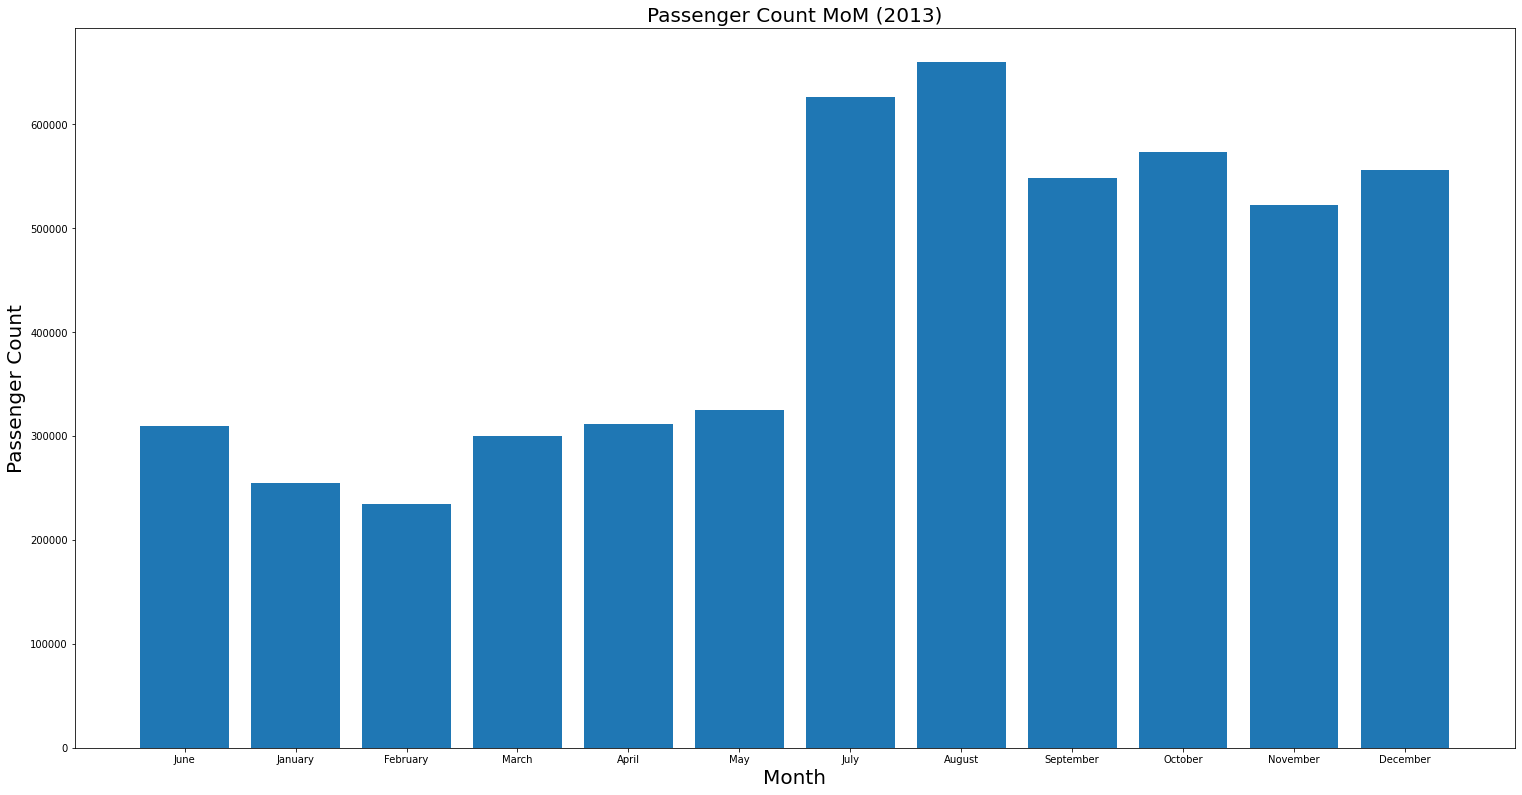

In [81]:
# we basically want to plot Passenger Count against Activity Period(Month) 

fig2 = plt.figure(figsize=(20,10)) # setting the size of the plot
ax = fig2.add_axes([0,0,1,1]) #x-origin, y-origin, width, height

Month_2013 = df_passenger_stats_2013['Month'] # assigning the values in Month to be the x-axis parameter
Passenger_Count_2013 = df_passenger_stats_2013['Passenger Count'] # assigning the values in Total Complaints to be the y-axis parameter

ax.bar(Month_2013, Passenger_Count_2013) # x, y

plt.title('Passenger Count MoM (2013)', fontsize=20) # main title
plt.xlabel('Month', fontsize=20) # x-axis label
plt.ylabel('Passenger Count', fontsize=20) # y-axis label
plt.show()

In [82]:
# specifiying the activity period to only be within 2016 
df_passenger_stats_2016 = df_passenger_stats[(df_passenger_stats['Year'] == 2016)]
df_passenger_stats_2016

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
12403,201603,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,7604,Enplaned,7604,2016,March
14637,201601,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Deplaned,Other,International,G,4589,Deplaned,4589,2016,January
14638,201601,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Enplaned,Other,International,G,3801,Enplaned,3801,2016,January
14639,201601,Aeromexico,AM,Aeromexico,AM,International,Mexico,Deplaned,Other,International,A,12444,Deplaned,12444,2016,January
14640,201601,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,10399,Enplaned,10399,2016,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


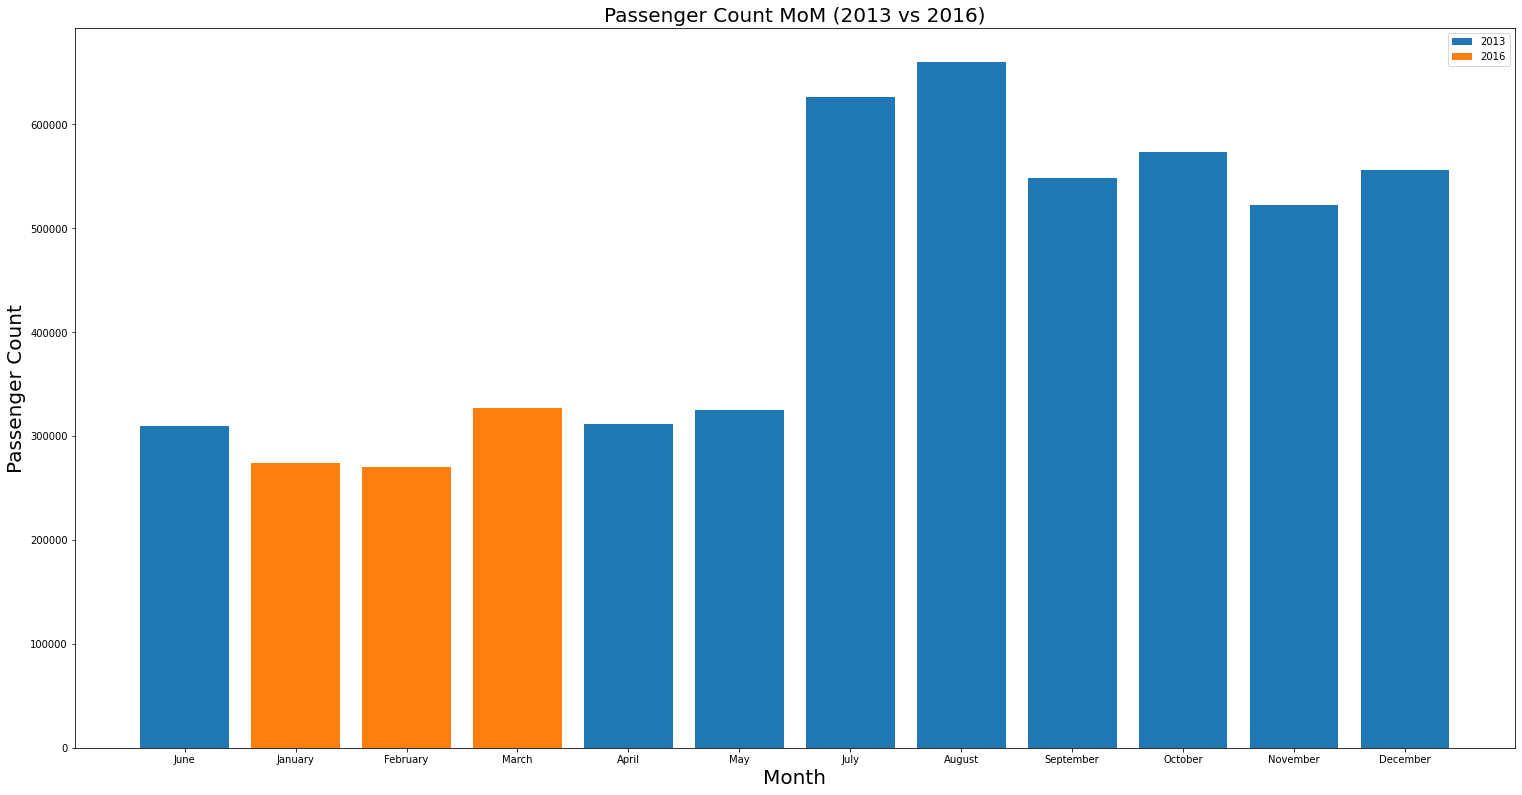

In [83]:
# we basically want to plot Passenger Count against Activity Period (Month) 

fig3 = plt.figure(figsize=(20,10)) # setting the size of the plot
ax = fig3.add_axes([0,0,1,1]) #x-origin, y-origin, width, height

Month_2016 = df_passenger_stats_2016['Month'] # assigning the values in Month to be the x-axis parameter
Passenger_Count_2016 = df_passenger_stats_2016['Passenger Count'] # assigning the values in Total Complaints to be the y-axis parameter

ax.bar(Month_2013, Passenger_Count_2013, label=2013) # x, y of 2013 
ax.bar(Month_2016, Passenger_Count_2016, label=2016) # x, y of 2016

plt.title('Passenger Count MoM (2013 vs 2016)', fontsize=20) # main title
plt.xlabel('Month', fontsize=20) # x-axis label
plt.ylabel('Passenger Count', fontsize=20) # y-axis label
plt.legend()
plt.show()

**Comments:** 

We can see that there is a different outlook when it comes to air traffic statistics. For year 2013, there are more flights occuring in and out of SFO but the noise complaints were low as compared to year 2016 where there were less flights occurring but the noise complaints filed were at an all time high

# Factor 1: Factors relating to Aircraft


****

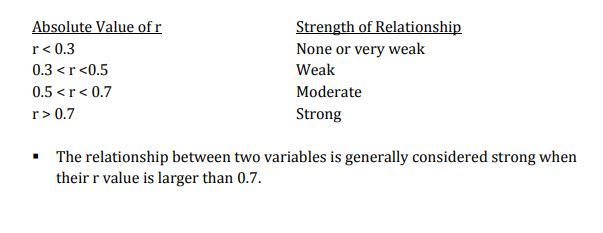

In [84]:
# Benchmark for Pearson Correlation 
from IPython.display import Image
Image("Pearson_Correlation_Benchmarks.JPG")

## SEL vs Altitude

Dataset used: B737

In [85]:
df_737 = pd.read_csv("SEL data (B737).csv")
df_737.head(10)

,Date/Time (copy 2),Day of Date/Time,Time,Airport,Noise Monitor,Flight ID,Operation,Flight type,Equipment,Engine Model,Runway,SEL,Altitude
0,02/10/20 11:38:52 PM,2/10/20,11:38:52 PM,SEA,SEA22,ASA183,Departure,Passenger,B737,CFM56 SERIES,16L,82,"3,586"
1,02/10/20 11:38:37 PM,2/10/20,11:38:37 PM,SEA,SEA21,ASA183,Departure,Passenger,B737,CFM56 SERIES,16L,82,"3,095"
2,02/10/20 11:38:29 PM,2/10/20,11:38:29 PM,SEA,SEA28,ASA183,Departure,Passenger,B737,CFM56 SERIES,16L,84,"2,657"
3,02/10/20 11:38:15 PM,2/10/20,11:38:15 PM,SEA,SEA20,ASA183,Departure,Passenger,B737,CFM56 SERIES,16L,84,"2,110"
4,02/10/20 11:37:55 PM,2/10/20,11:37:55 PM,SEA,SEA18,ASA183,Departure,Passenger,B737,CFM56 SERIES,16L,84,"1,864"
5,02/10/20 11:37:52 PM,2/10/20,11:37:52 PM,SEA,SEA19,ASA183,Departure,Passenger,B737,CFM56 SERIES,16L,88,"1,908"
6,02/10/20 11:37:36 PM,2/10/20,11:37:36 PM,SEA,SEA17,ASA183,Departure,Passenger,B737,CFM56 SERIES,16L,85,"1,485"
7,02/10/20 11:25:53 PM,2/10/20,11:25:53 PM,SEA,SEA13,ASA66,Arrival,Passenger,B737,CFM56 SERIES,16R,74,716
8,02/10/20 11:25:04 PM,2/10/20,11:25:04 PM,SEA,SEA11,ASA66,Arrival,Passenger,B737,CFM56 SERIES,16R,85,"1,231"
9,02/10/20 11:23:30 PM,2/10/20,11:23:30 PM,SEA,SEA09,ASA66,Arrival,Passenger,B737,CFM56 SERIES,16R,83,"2,369"


**P-value and Alpha** 

We compare the p-value with the
alpha to determine whether the observed data are statistically significantly different from the null
hypothesis:  

If the p-value is less than or equal to the alpha (p < 0.05), then we reject the null hypothesis, and
we say the result is statistically significant.  

If the p-value is greater than alpha (p > 0.05), then we fail to reject the null hypothesis, and we say
that the result is statistically nonsignificant (n.s.)

Common alphas include: 0.01, 0.05, 0.1

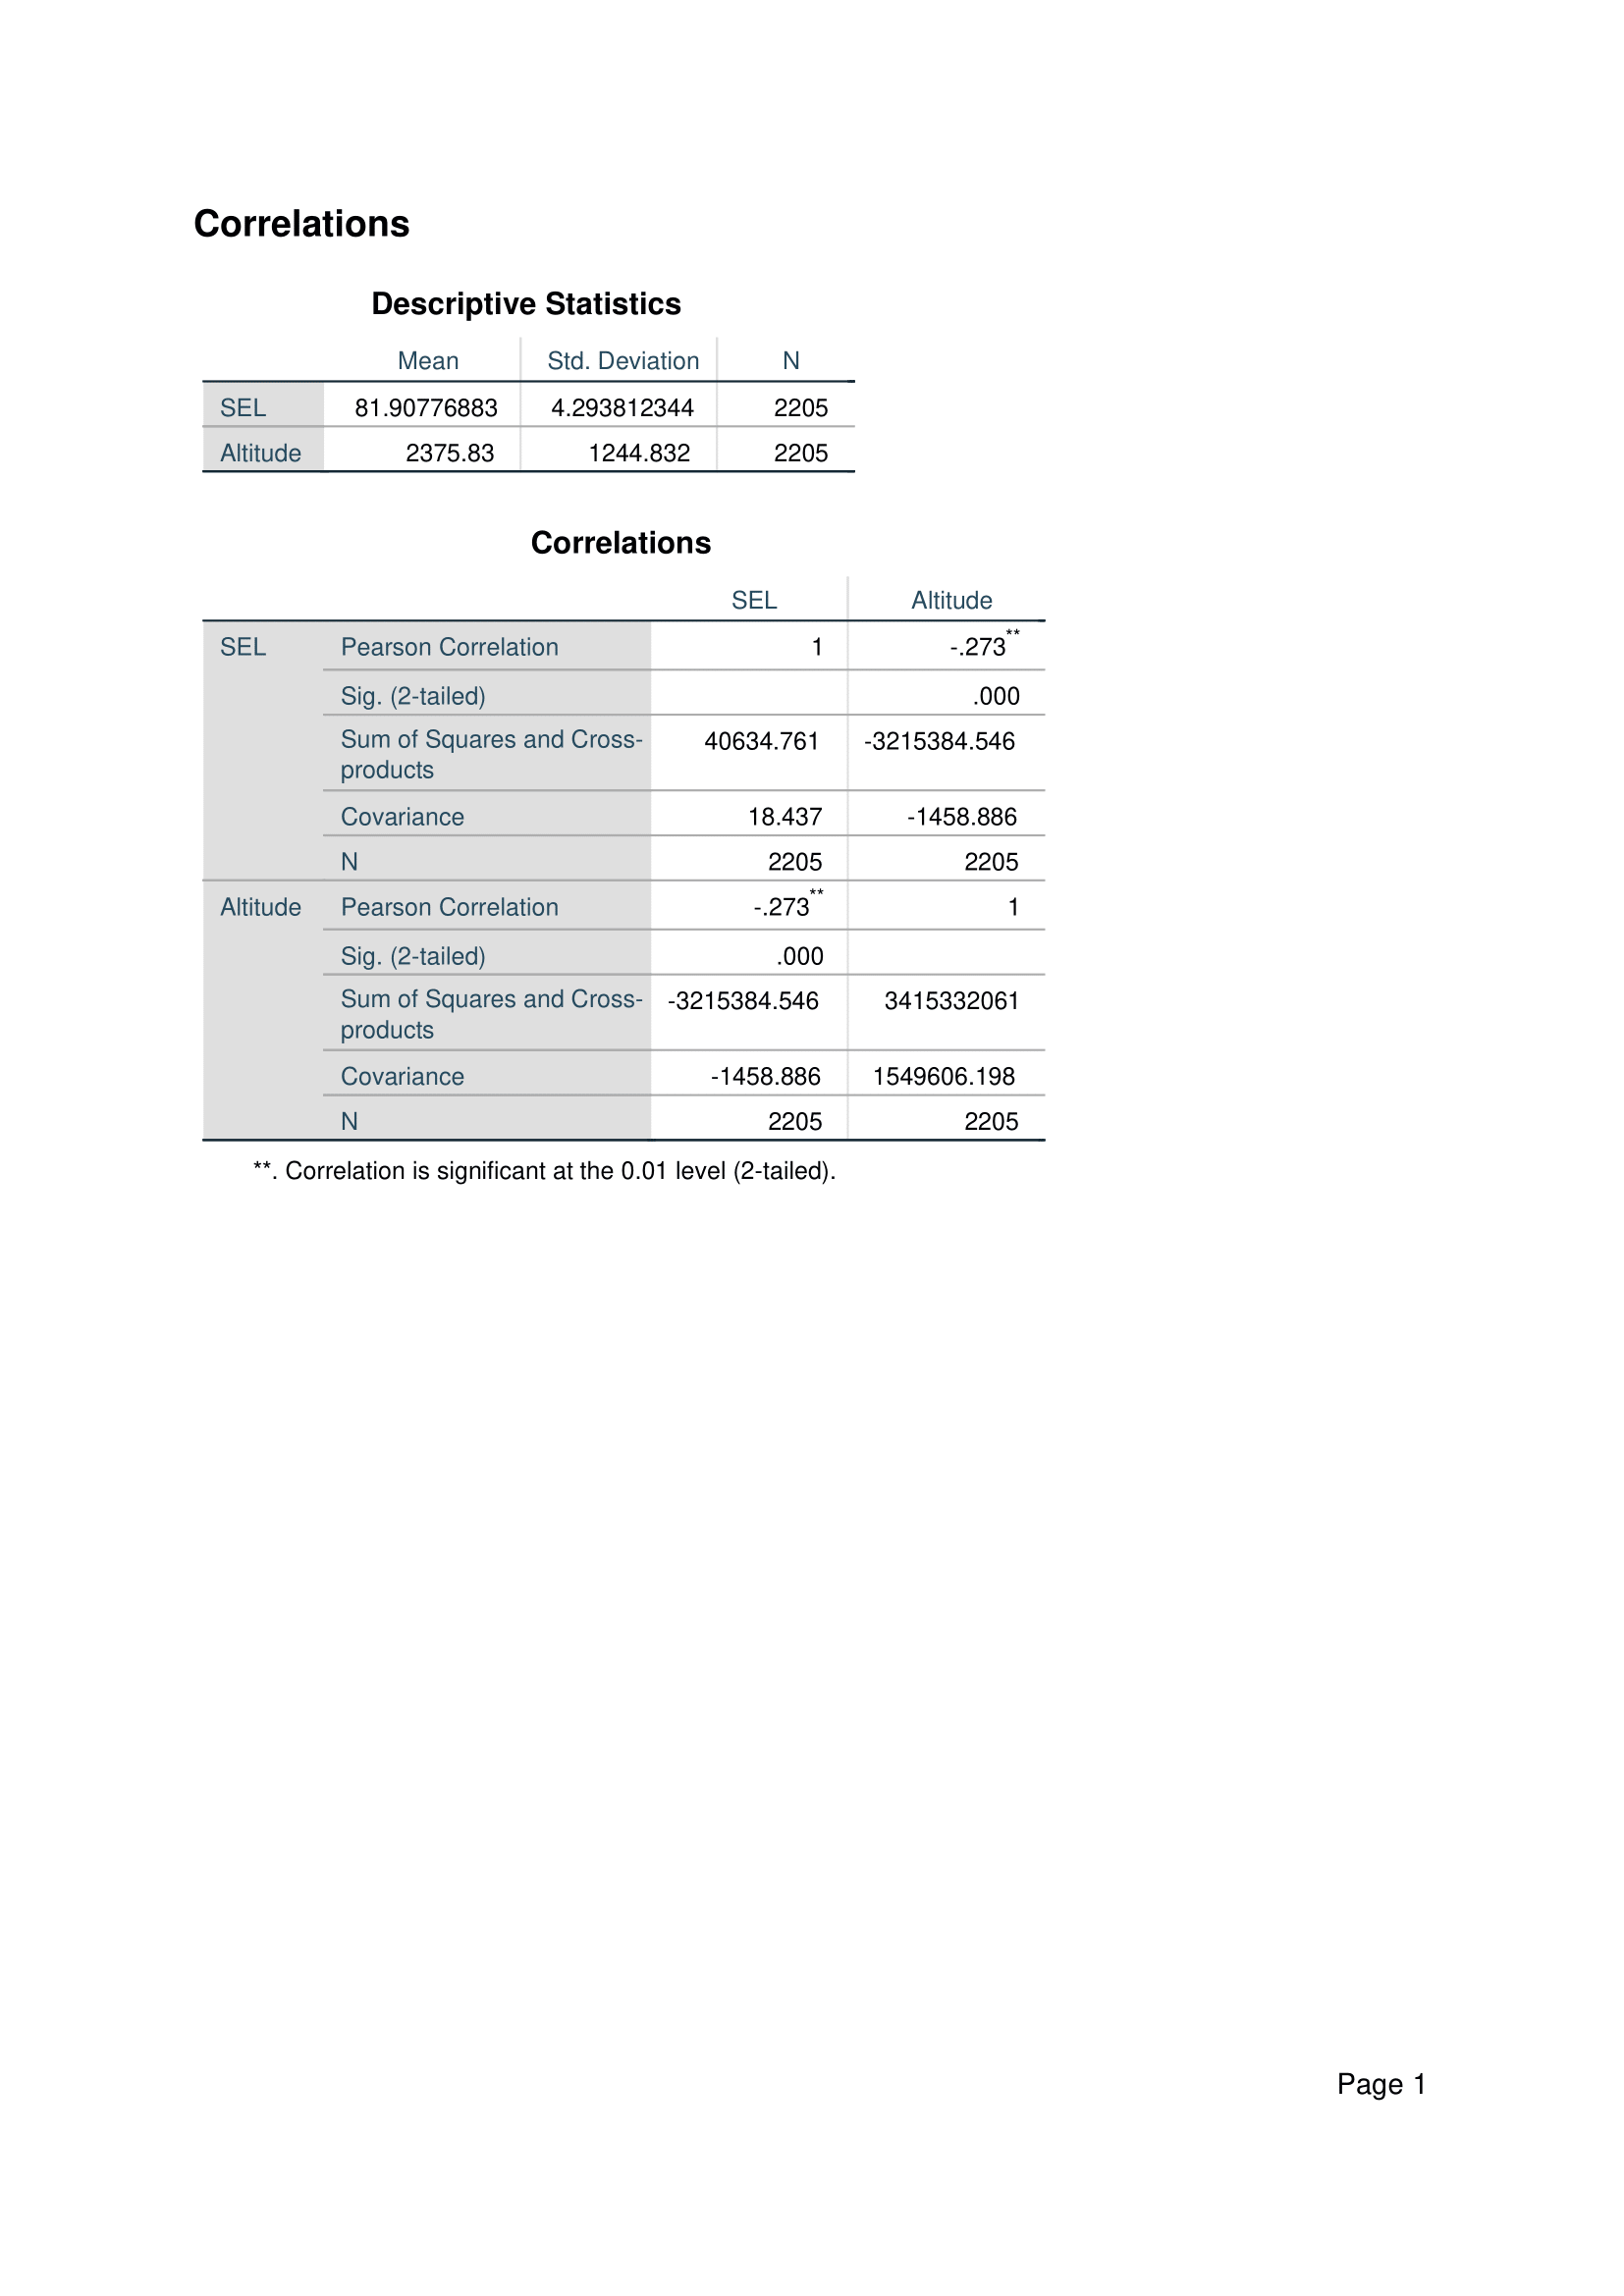

In [86]:
# SEL vs Altitude (Pearson Correlation)
# negative coefficient explains the downward slope 
# High significance 
from IPython.display import Image
Image("737_Pearson_Characteristics-1.png")

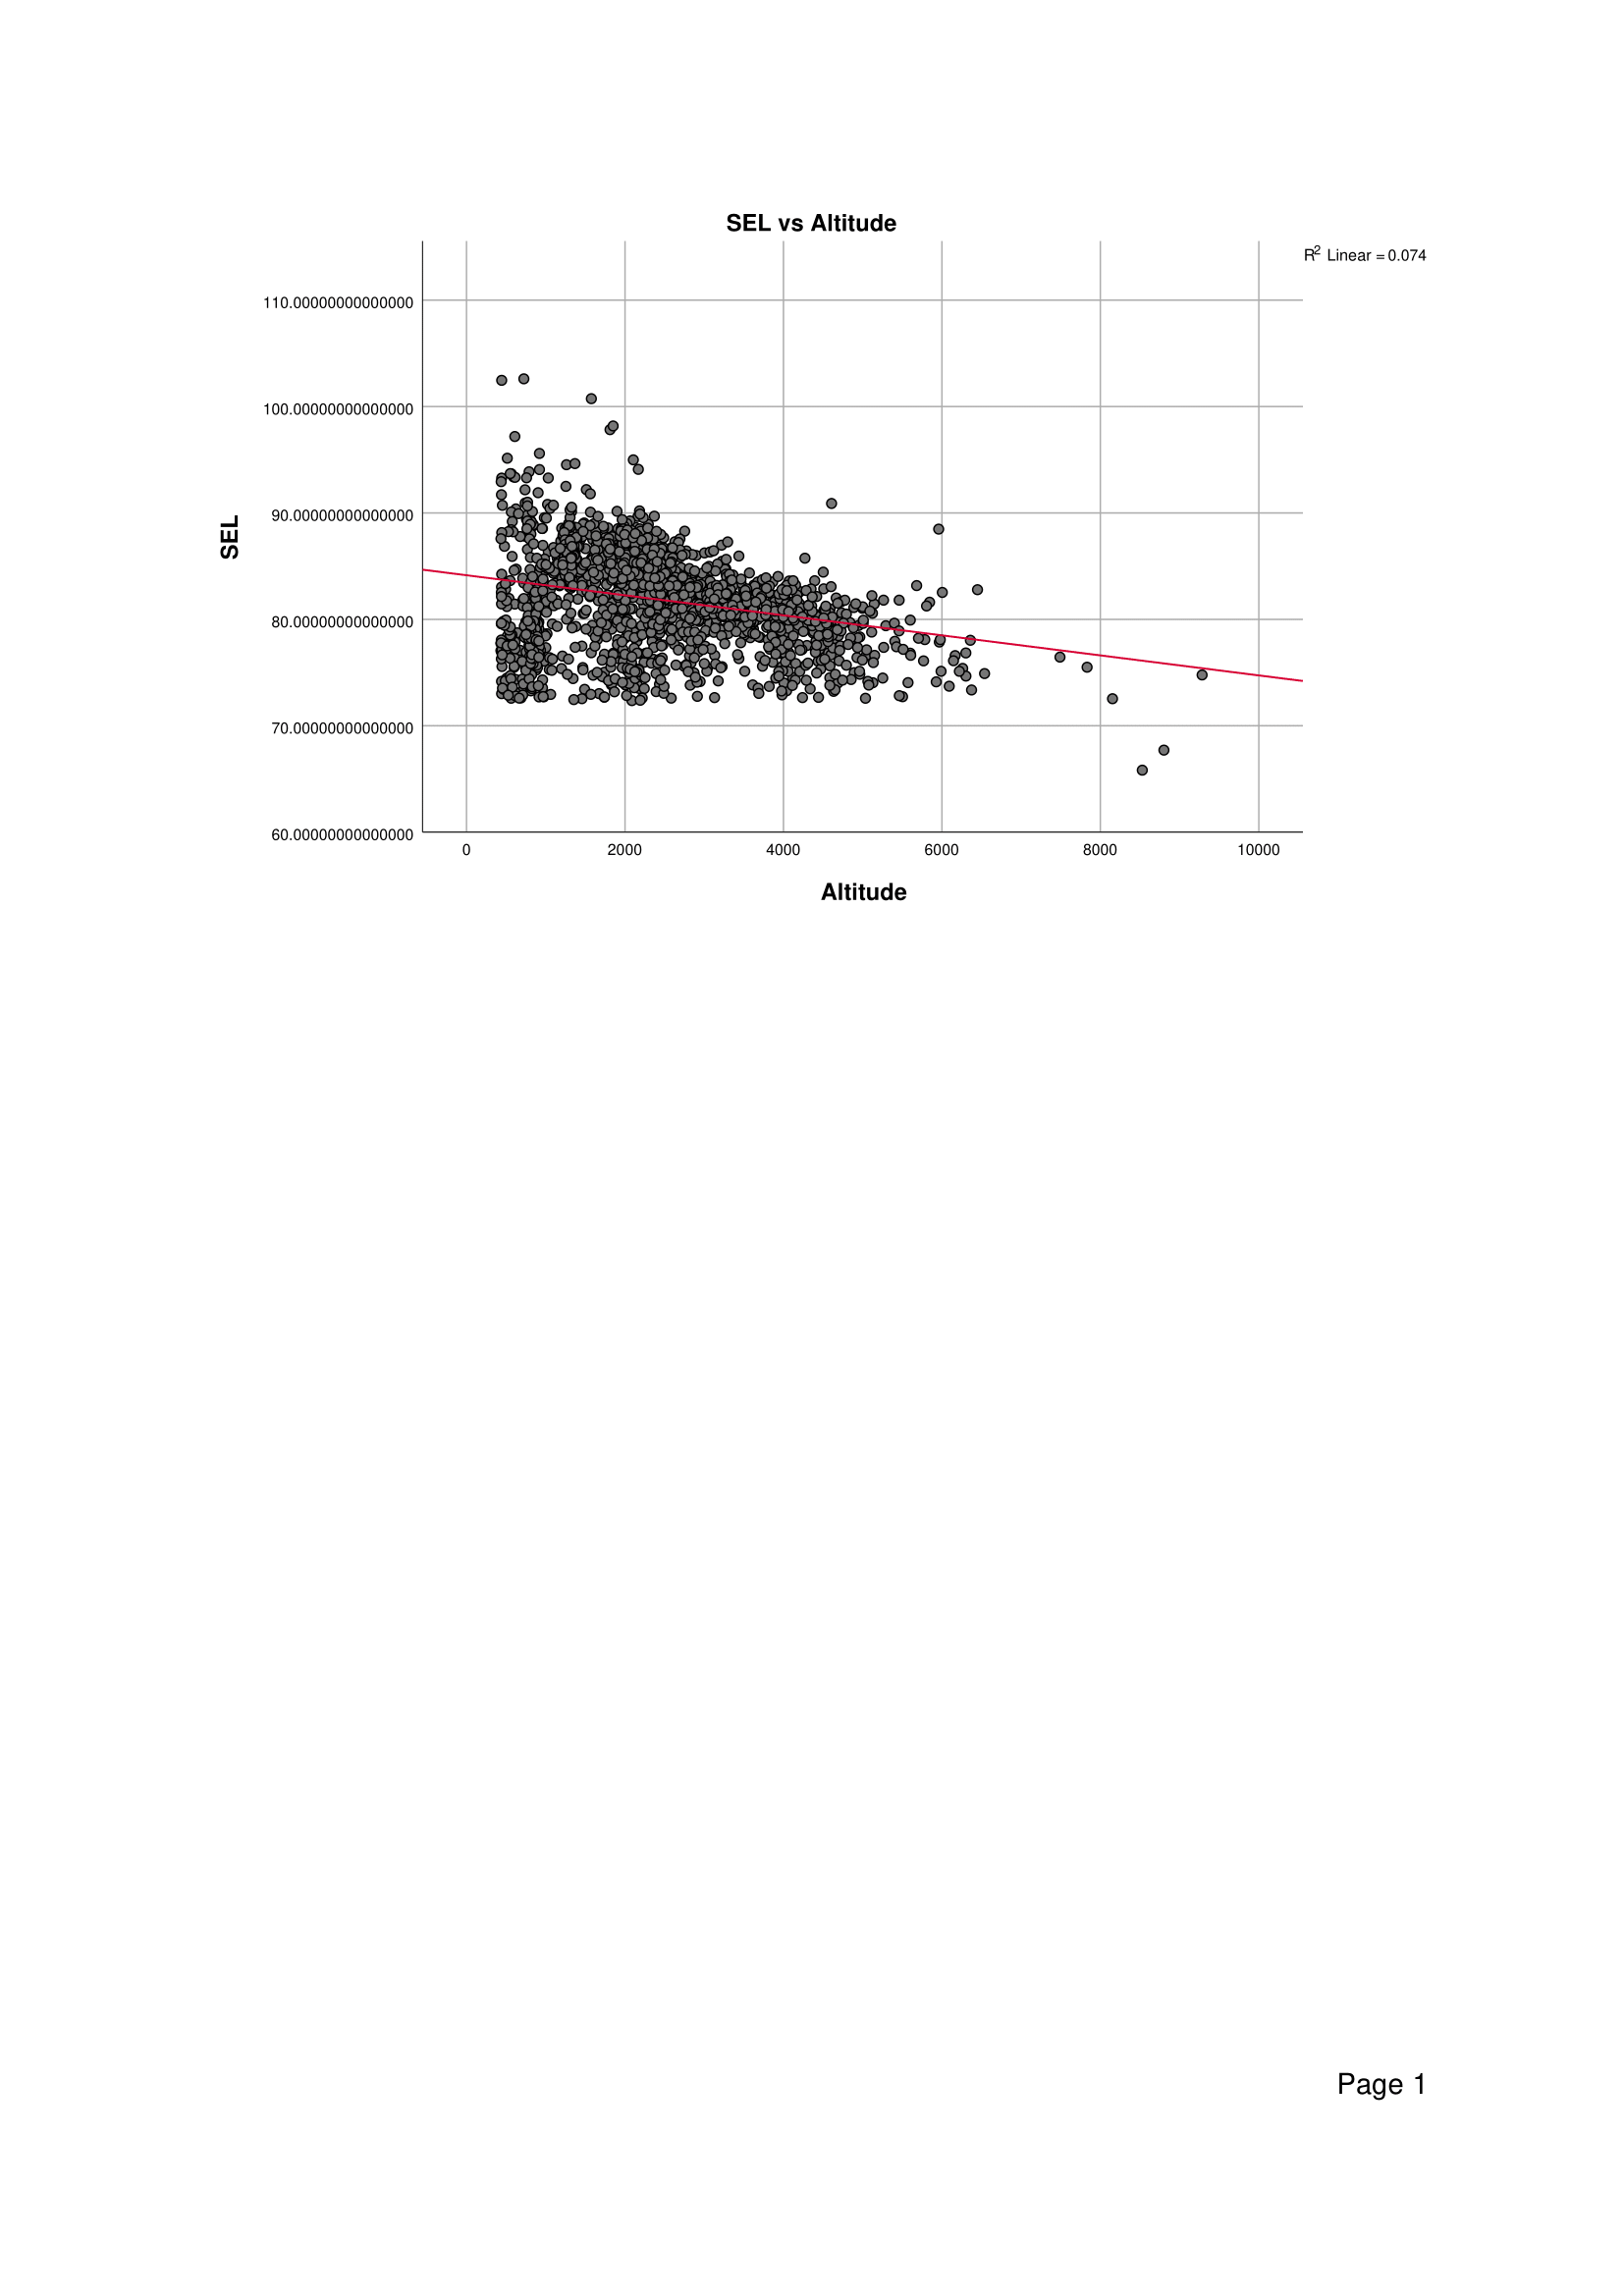

In [87]:
# displays relationship between SEL vs altitude 
# Need to zoom picture a little bit 
# Or project this using Python
from IPython.display import Image
Image("737_Pearson_Output-1.png")

Null hypothesis: There is no change in SEL with a change in Altitude 

Alternative hypothesis: SEL changes with respect to Altitude

Since both SEL and Altitude are continuous variables, the Pearson Correlation test is employed to test for the correlation between the two. The alpha selected for this test is (a = 0.05). The Pearson Correlation Coefficient (r) and p-value returns -0.273 and (p < 0.001) respectively.  

The negative value of r indicates a downward slope as seen on the SEL-Altitude graph, plotted on Tableau. Despite returning an albeit weak correlation coefficient, the p value shows a strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.  

From the graph as well, we can observe that as the altitude increases, the SEL decreases which is what is expected of from this test. 

------------------------------------------

df = n-2
df = 2205 - 2 = 2203 

r(2203) = -.273, p < 0.05

## SEL vs Time 

Dataset used: B747-400
 

In [88]:
df_747 = pd.read_csv('SEL data (B747-400).csv')
df_747

,Date/Time (copy 2),Day of Date/Time,Time,Airport,Noise Monitor,Flight ID,Operation,Flight type,Equipment,Engine Model,Runway,SEL,Altitude
0,02/09/20 9:47:58 AM,2/9/20,9:47:58 AM,SEA,SEA09,GTI2871,Departure,Cargo,B744,CF6-80C2B1F,34R,79,"4,528"
1,02/09/20 9:46:57 AM,2/9/20,9:46:57 AM,SEA,SEA10,GTI2871,Departure,Cargo,B744,CF6-80C2B1F,34R,81,"3,072"
2,02/09/20 9:46:53 AM,2/9/20,9:46:53 AM,SEA,SEA09,GTI2871,Departure,Cargo,B744,CF6-80C2B1F,34R,91,"3,195"
3,02/09/20 9:46:12 AM,2/9/20,9:46:12 AM,SEA,SEA11,GTI2871,Departure,Cargo,B744,CF6-80C2B1F,34R,92,"2,087"
4,02/09/20 9:45:49 AM,2/9/20,9:45:49 AM,SEA,SEA12,GTI2871,Departure,Cargo,B744,CF6-80C2B1F,34R,99,"1,670"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,02/03/20 5:21:44 PM,2/3/20,5:21:44 PM,SEA,SEA11,CAL5261,Arrival,Cargo,B744,CF6-80C2B1F,16L,81,"1,348"
84,02/03/20 5:20:20 PM,2/3/20,5:20:20 PM,SEA,SEA09,CAL5261,Arrival,Cargo,B744,CF6-80C2B1F,16L,88,"2,514"
85,NaN,NaN,NaN,NaN,SEA10,CAL5261,Arrival,Cargo,B744,CF6-80C2B1F,16L,84,"2,929"
86,02/03/20 5:19:54 PM,2/3/20,5:19:54 PM,SEA,SEA07,CAL5261,Arrival,Cargo,B744,CF6-80C2B1F,16L,73,"3,277"


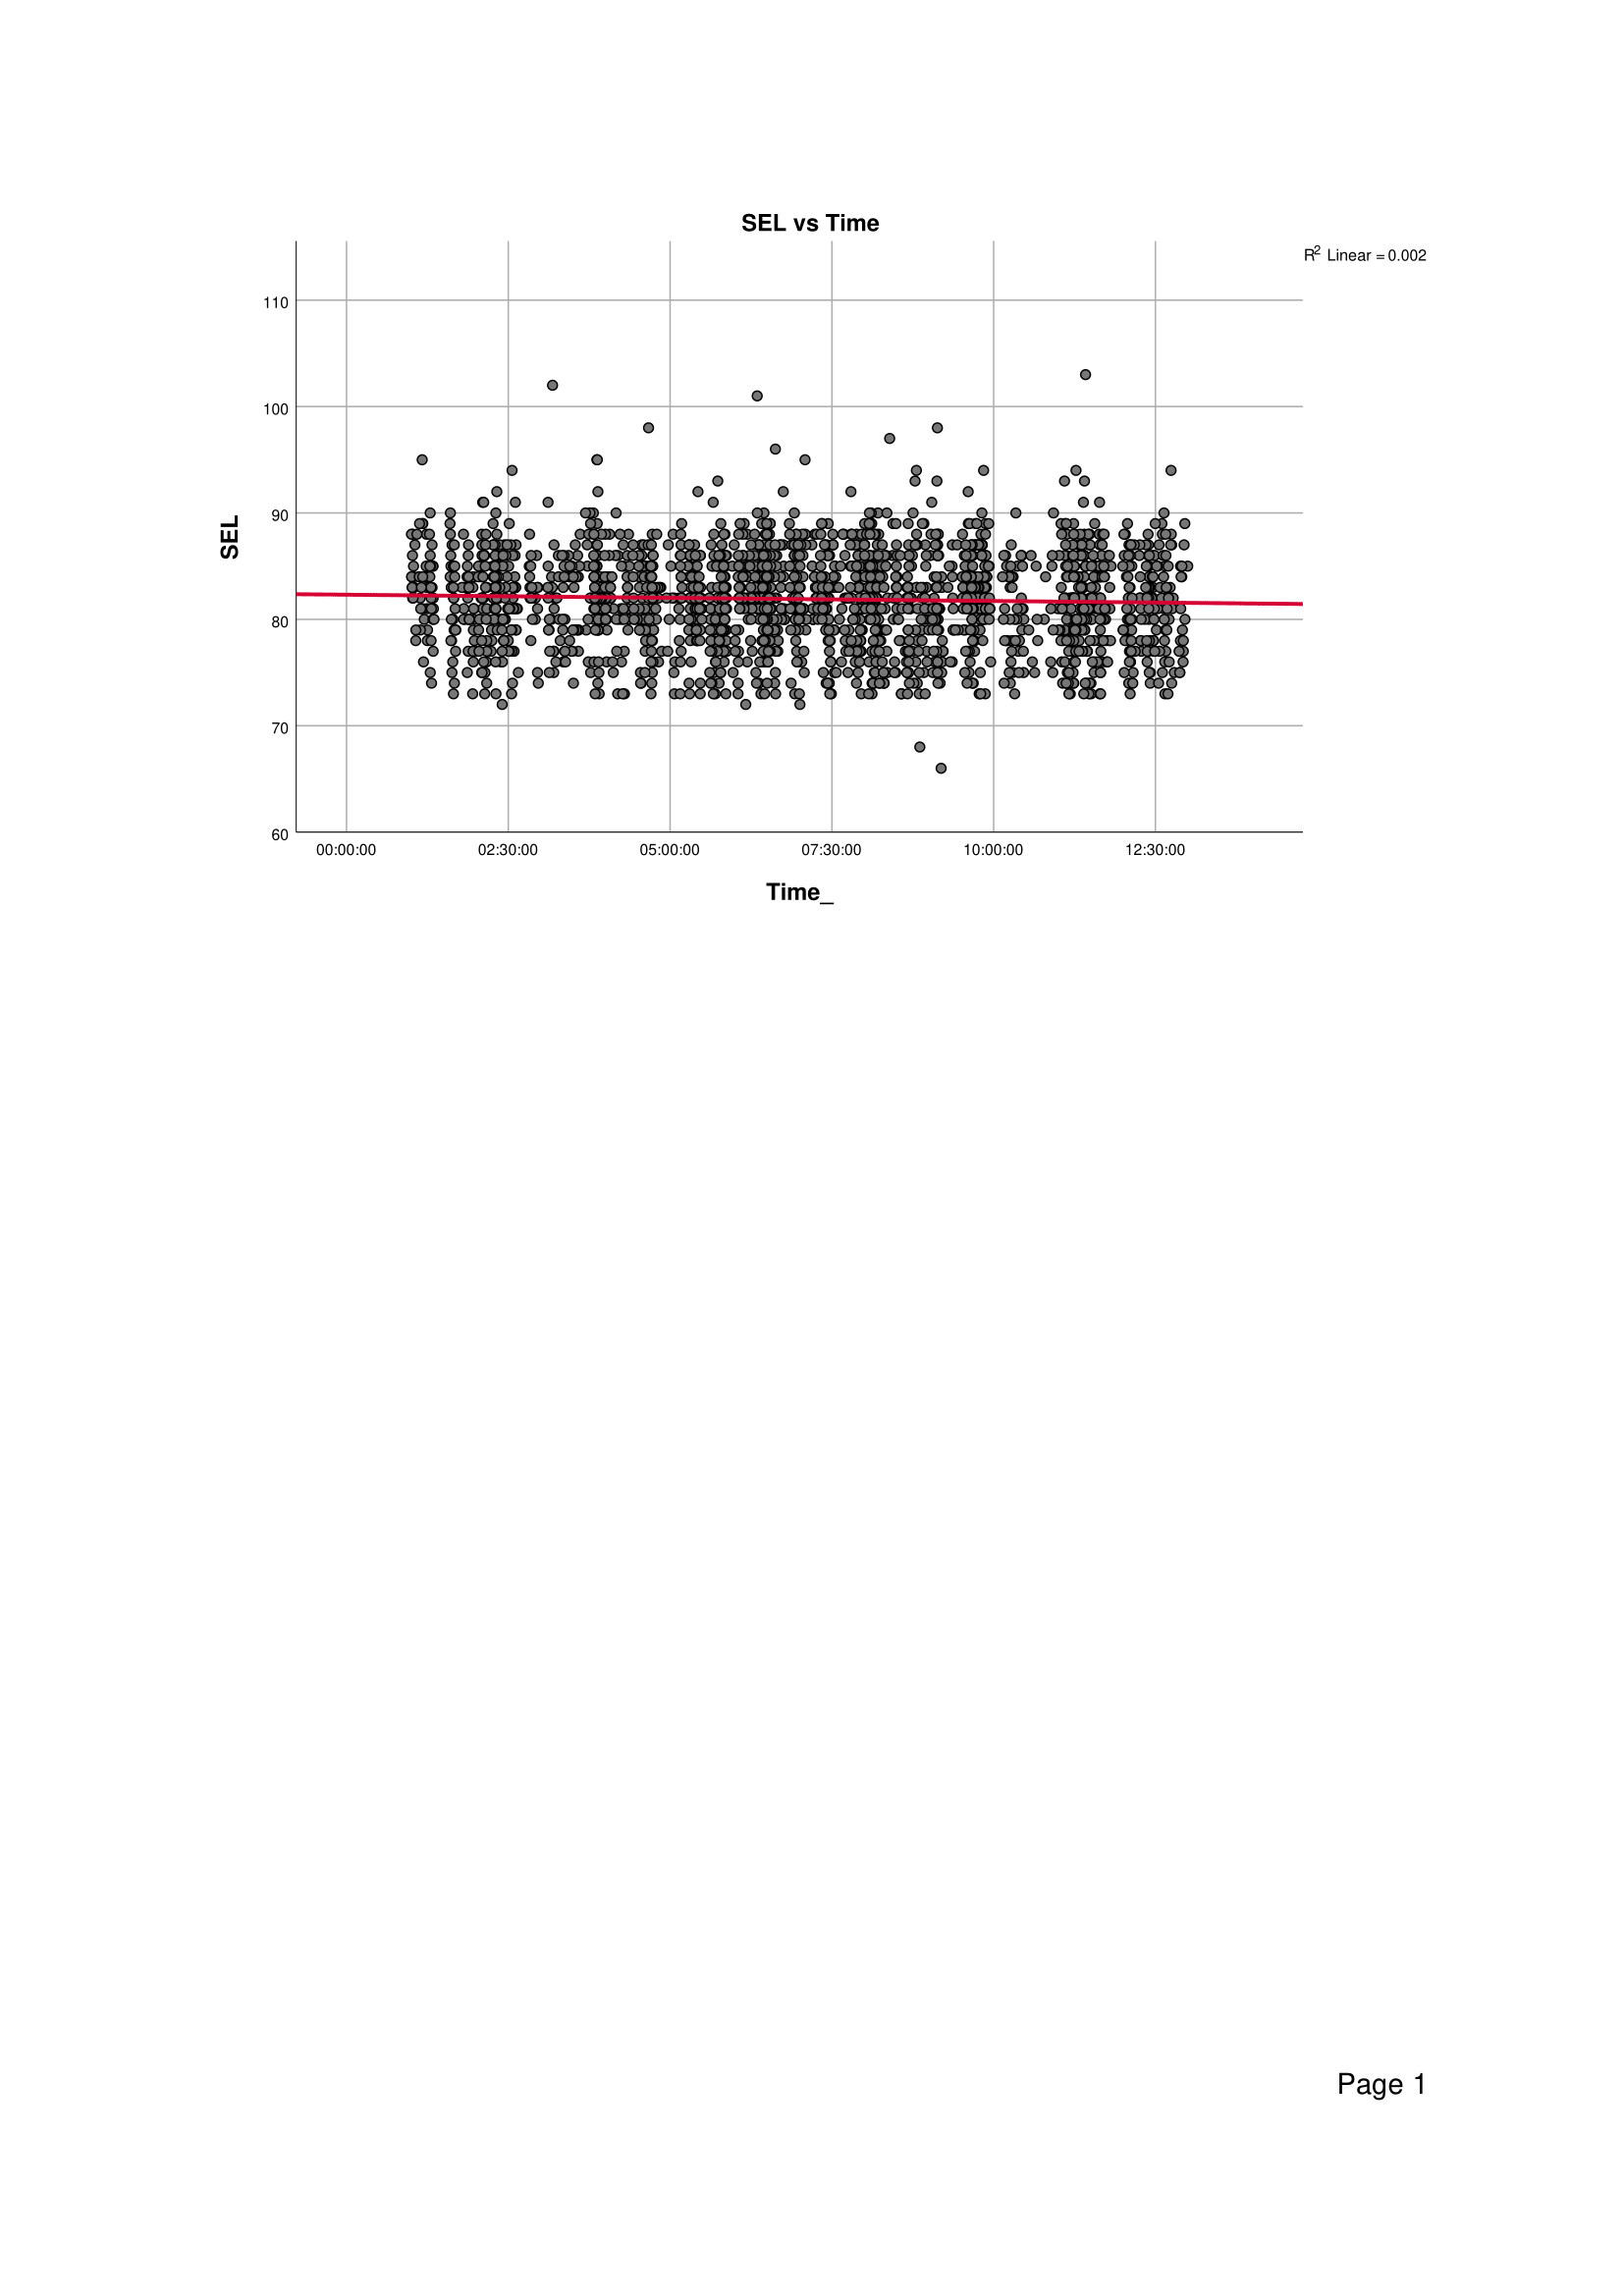

In [89]:
# SEL vs Time relationship 
# Need to do a more in depth study on this relationship 
# Basically day or night will more complaints be generated 
# Include relevant readings/ sources 
from IPython.display import Image
Image("SEL_Time_Output_Pearson_Correlation-1.png")

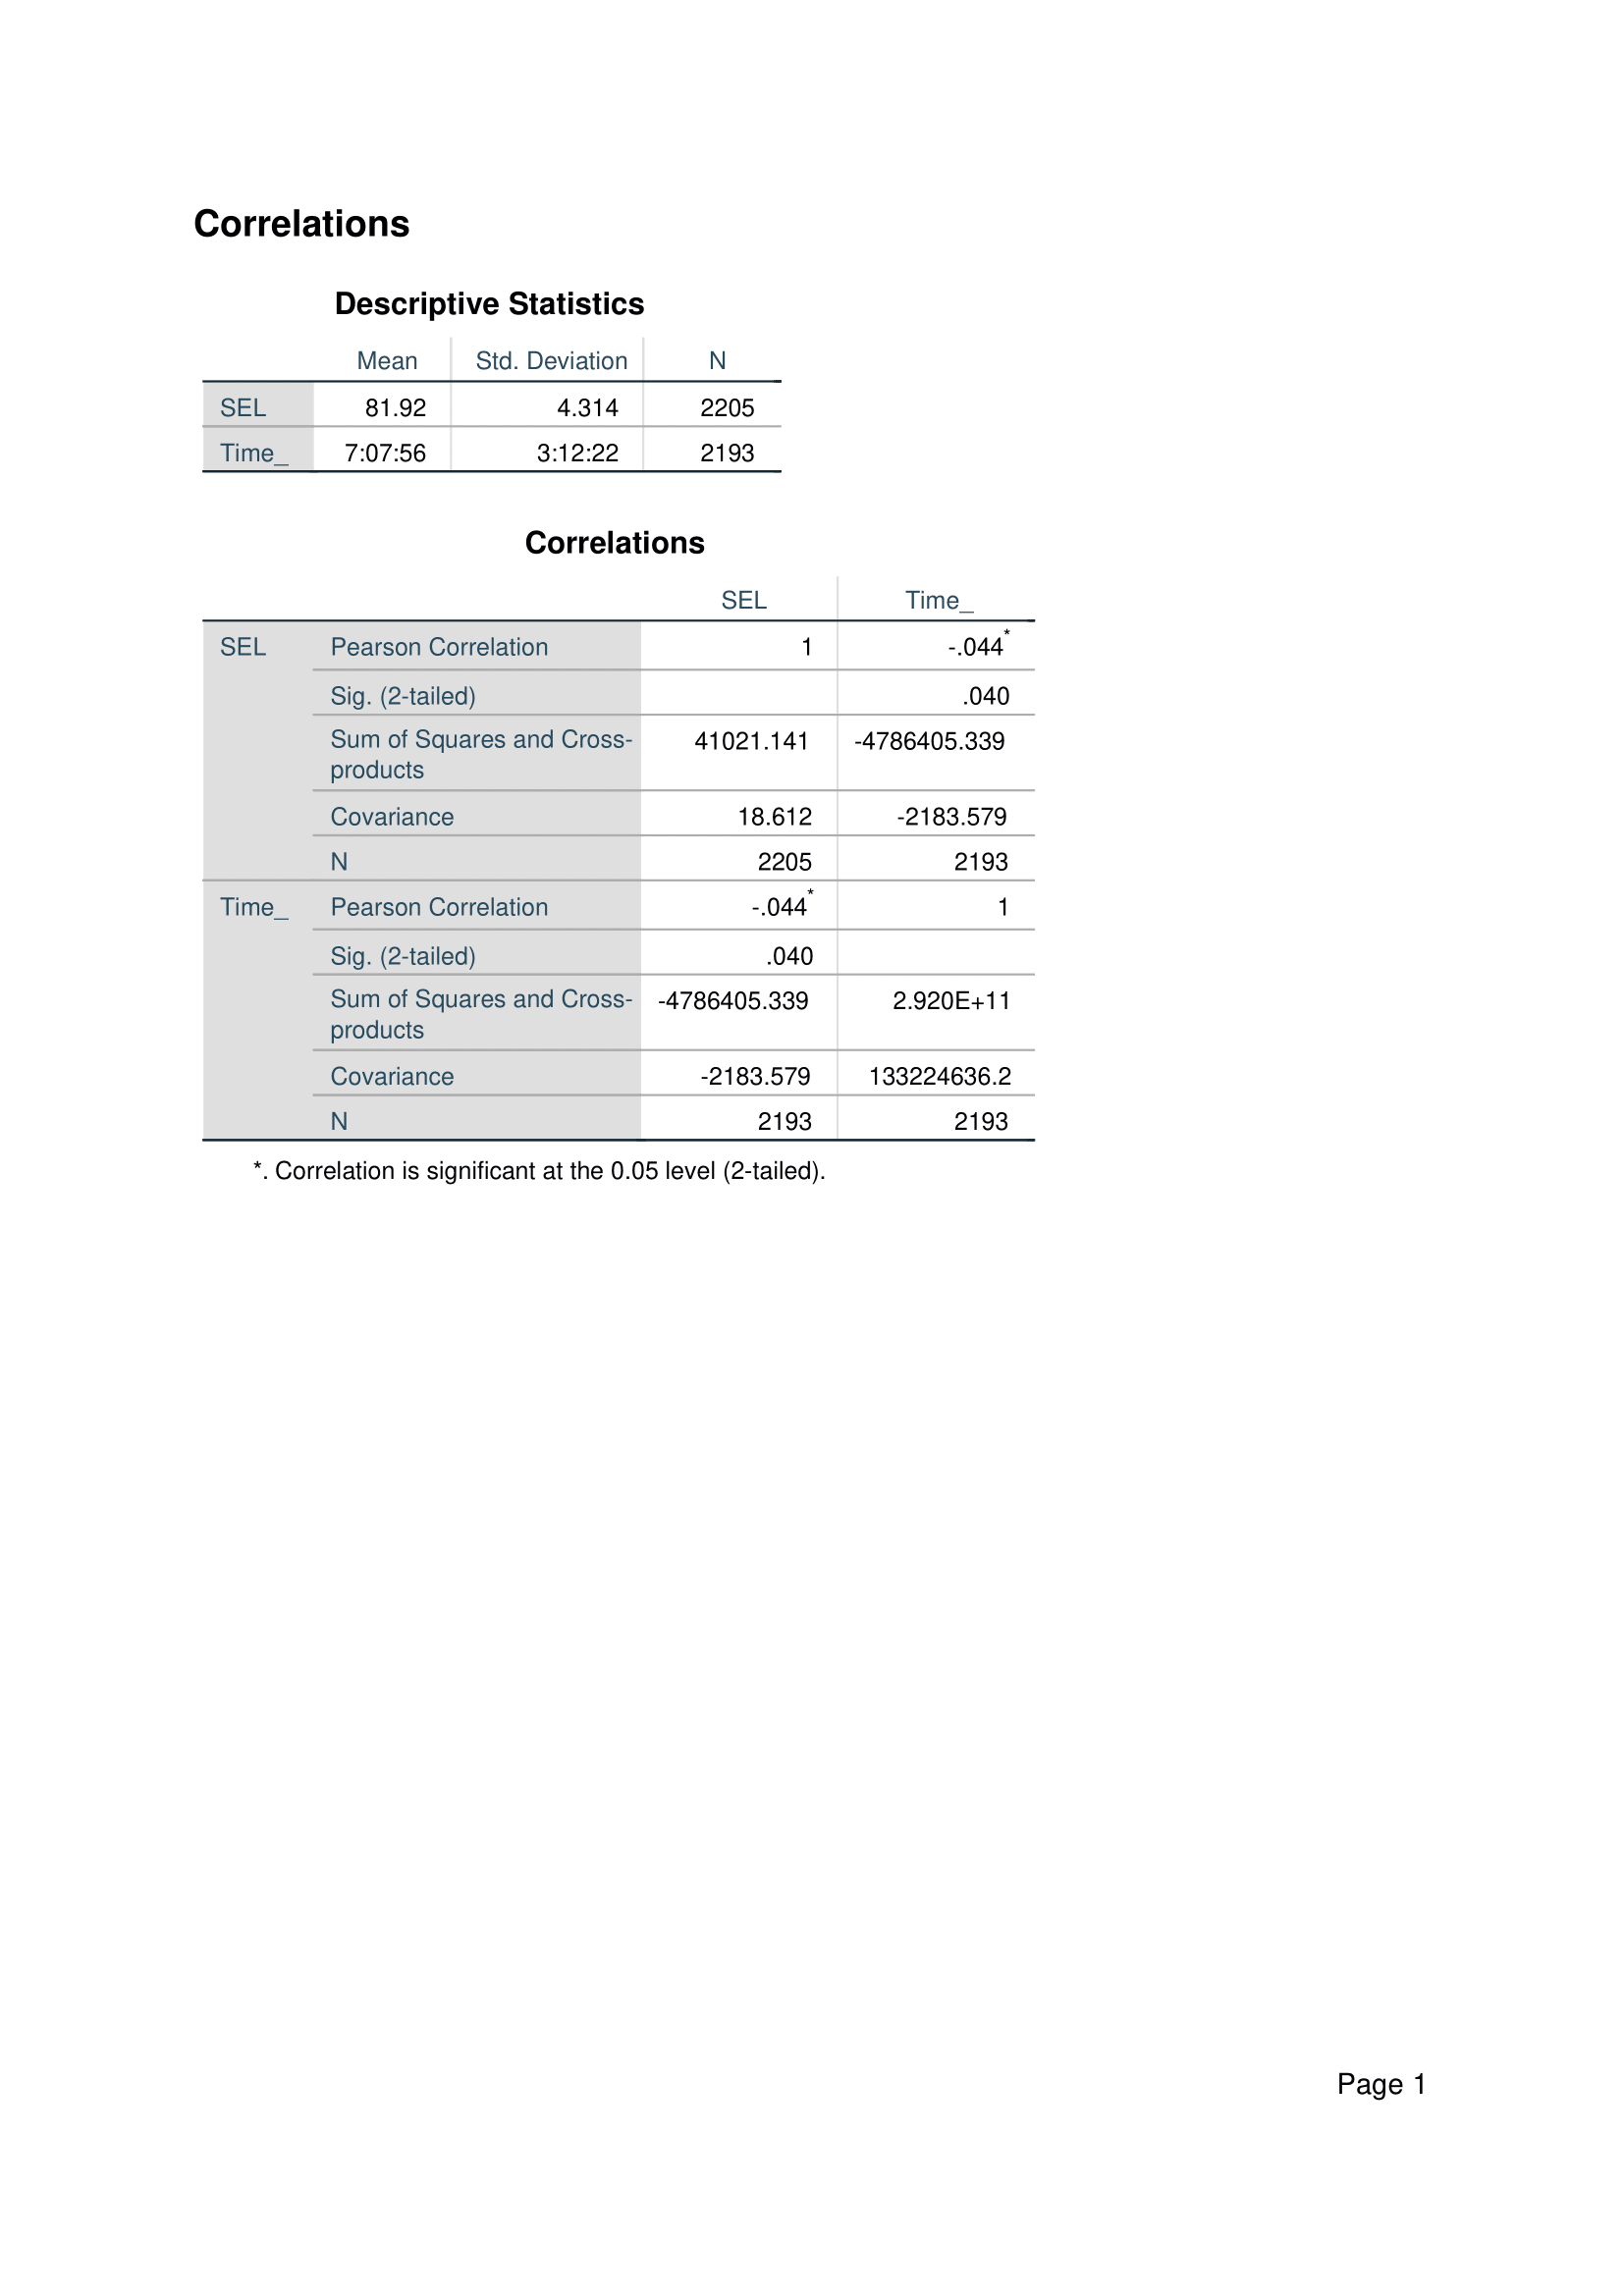

In [90]:
# Time vs SEL relationship 
# Through use of Pearson Correlation 

from IPython.display import Image
Image("SEL_Time_Pearson_Correlation-1.png")

Null hypothesis: There is no relationship that exists between Time of the day and the SEL produced by the aircraft. 

Alternative hypothesis: SEL produced by the aircraft is a function of time. 

Since both Time and SEL are continuous variables, the Pearson Correlation test is employed to test for the correlation between the two. The alpha selected for this test is (a = 0.05). The Pearson Correlation Coefficient (r) and p-value returns -0.024 and (p < 0.001) respectively.  

The r value albeit weak as indicated, is a testement to the large sample size that we have (n = 13448). As the r value is negative, we can also observe the downward trend line as indicated in red. The p value is also smaller than the predetermined alpha of 0.05 which means that the null hypothesis is to be rejected. There is also studies that have linked the timing and the noise produced by the aircraft. # to quote relevant studies on this!!

------------------------------------------

r(13446) = -.24, p < 0.05

Note: A significance value < than the alpha I chose (0.05) would mean that there is enough statistical evidence to suggest that the correlation I observe does exist in the population

# Factor 2: Humans  
Personal and Attitudinal Factors



**Human Noise Sensitivity**

The variation among individuals in response to effects of aircraft noise is often conceptualized as noise sensitivity (Smith, 2003). Some individuals are intensely annoyed at very low sound levels, while others remain calm even when exposed to higher noise levels. Such annoyance sensitivity involves a complex interaction of physical (i.e., noise level and frequency), biological (i.e., auditory system), psychological (i.e., signal interpretation and health status), and sociological processes (i.e., socioeconomic status, culture, and lifestyle) (Schultz, 1978).







**Dataset Used**  

The dataset used for the purpose of understanding humans' personal and attitudinal factors, is taken from a study ("Relationship of Transportation Noise and
Annoyance for Two Metropolitan Cities in
Korea: Population Based Study" done by Joo Hyun Sung, Jiho Lee, Sang Jin Park, Chang Sun Sim, Department of Occupational and Environmental Medicine, Ulsan University Hospital, University of Ulsan
College of Medicine, Ulsan, Rep of Korea

Citation: Sung, L. (2016). Relationship of Transportation Noise and Annoyance for Two Metropolitan Cities in Korea: Population Based Study. PloS One, 11(12), e0169035–e0169035. https://doi.org/10.1371/journal.pone.0169035



In [91]:
df_Korean_study = pd.read_csv("Seoul_Ulsan_Combined.csv")
df_Korean_study.head(10)

,ID,Region,Noise,Age,Residence,Noise_sensitivity,Sex,Education,Martial_status,Income,Smoking,Alcohol,Exercise,Annoyance,HA,A
0,u-1,ulsan,over 65,36,8,5,female,college and more,married,3000 KRW and more,current non smoker,no,yes,4,normal,normal
1,u-2,ulsan,over 65,70,8,5,female,high school and less,etc,3000 KRW and more,current non smoker,yes,yes,6,normal,abnormal
2,u-3,ulsan,under 55,55,20,5,female,high school and less,married,3000 KRW and more,current non smoker,yes,no,7,normal,abnormal
3,u-4,ulsan,under 55,28,21,9,male,college and more,single,3000 KRW and more,current non smoker,no,no,8,abnormal,abnormal
4,u-5,ulsan,under 55,29,6,6,female,college and more,single,3000 KRW and more,current non smoker,no,no,7,normal,abnormal
5,u-6,ulsan,under 55,36,6,3,female,college and more,married,3000 KRW and more,current non smoker,yes,no,3,normal,normal
6,u-7,ulsan,under 55,36,5,6,female,college and more,married,3000 KRW and more,current non smoker,no,no,6,normal,abnormal
7,u-8,ulsan,under 55,23,19,4,male,college and more,single,3000 KRW and more,current non smoker,yes,no,5,normal,normal
8,u-9,ulsan,under 55,55,19,3,male,college and more,married,3000 KRW and more,current smoker,yes,yes,3,normal,normal
9,u-10,ulsan,under 55,72,1,8,male,high school and less,etc,under 3000 KRW,current non smoker,yes,no,4,normal,normal


## Noise Annoyance and Sex

First step in comparing the noise annoyance between males and females, is to assign the test variables and grouping variables accordingly. 

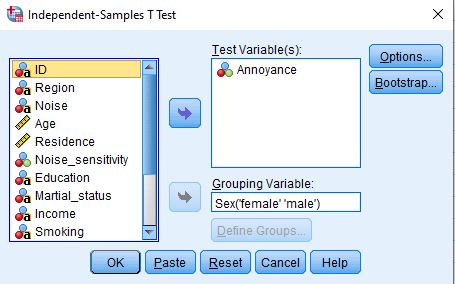

In [92]:
from IPython.display import Image
Image("Noise_Annoyance_&_Sex_Setup_1.JPG")

Because we are testing between the 2 genders, we name the first group as female
and the second group as male

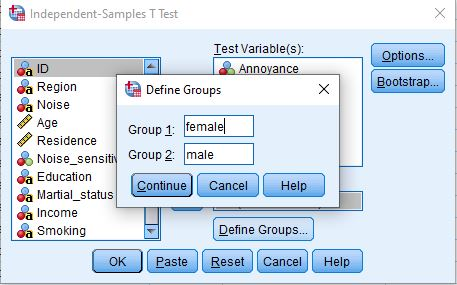

In [93]:
from IPython.display import Image
Image("Noise_Annoyance_&_Sex_Setup_2.JPG")

Next, we plot out the boxplot to give us a graphical representation between the means of the 2 genders


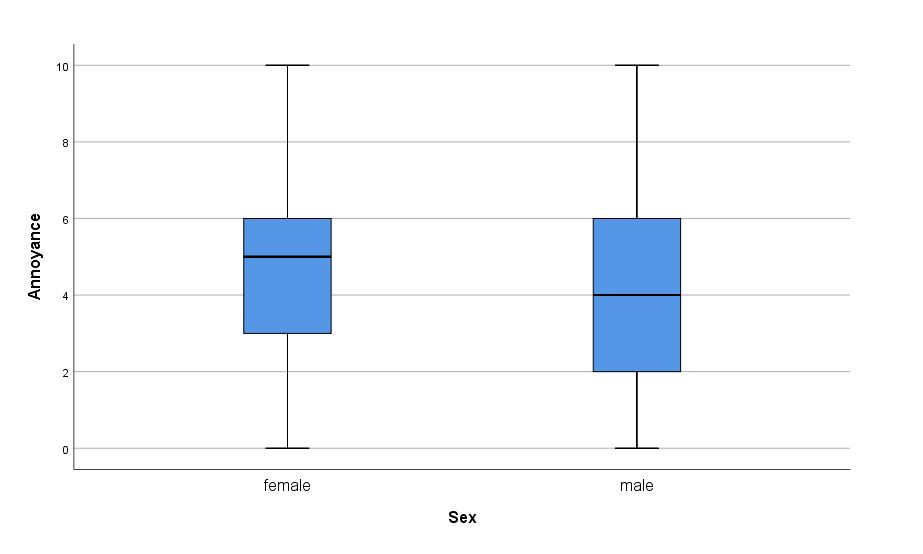

In [94]:
from IPython.display import Image
Image("Noise_Annoyance_&_Sex_Boxplot_Output.JPG")


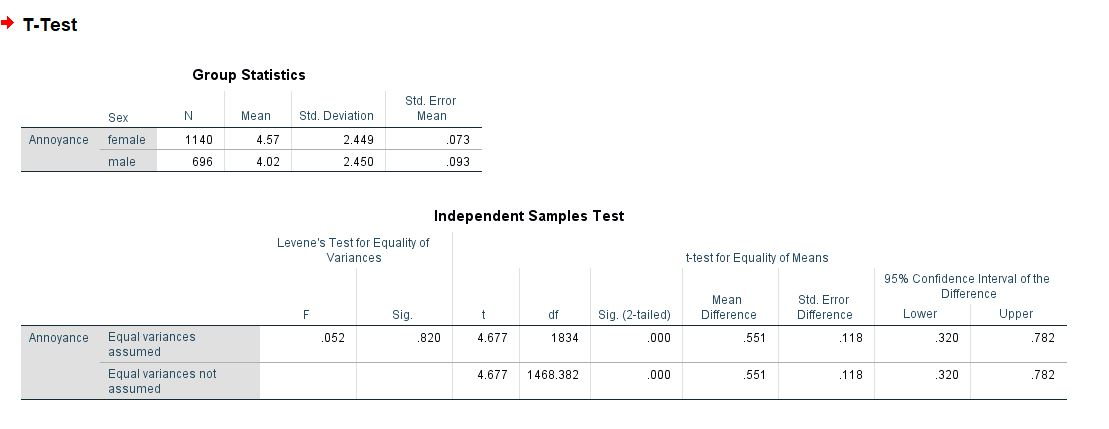

In [95]:
from IPython.display import Image
Image("Noise_Annoyance_&_Sex_Independent_T_Test_Output.JPG")

*2.1 Results*

Null hypothesis: There are no difference in annoyance levels between females and males

Alternative hypothesis: There are difference in annoyance levels between females and males

As the sex is a categorical variable and the level of annoyance, continuous, an independent samples T-test is employed to compare the means between the 2 groups (males vs females) 

The alpha chosen for this test is 0.05. 

The standard deviation between the 2 groups are also similar to one another. 

The degree of freedom for this test is: 1834. 

From the boxplot as seen above, we can observe that the means of annoyance between the 2 genders differ. Males on average are less annoyed as compared to females. There could be a probability that females are more likely to lodge a complaint with regards to noise as compared to males.

The mean difference is calculated by subtracting the mean from the first group (female) from the second group (males).

From the results as shown in the descriptive analysis table above, we can see that the Levene's test's p value returns 0.820. This value is greater than the predetermined alpha of 0.05. What this means is that we need to assume equal variances between the 2 groups (homoscedasticity). 

If we look at the corresponding significance value of the t-test, we can see that it returns (p < 0.01). This means that we can reject the null hypothesis and accept the alternative - that there is a difference in annoyance levels between females and males

-----------------------------------------
The average annoyance level of males was 4.02 (SD = 2.450)

The average annoyance level of females was 4.57 (SD = 2.449) 

There was a significant effect for gender: t(1834) = 4.68, p < 0.05, with females tend to be slightly annoyed with noise than males



## Noise Levels and Period of Residence

Null hypothesis: There is no correlation between period of residence and the exposed aircraft noise levels 

Alternative hypothesis: There is a correlation between period of residence and the exposed aircraft noise levels

The first step in analysing for the relationship is to set the variables up for analysis. In this case, since the dataset presents the noise level in the form of strings, recoding would be seen as the first step. 

The reason for recoding is because the SPSS software does not recognise strings for analysis. This recoding basically assigns a numerical value to the particular string similar to indexing.

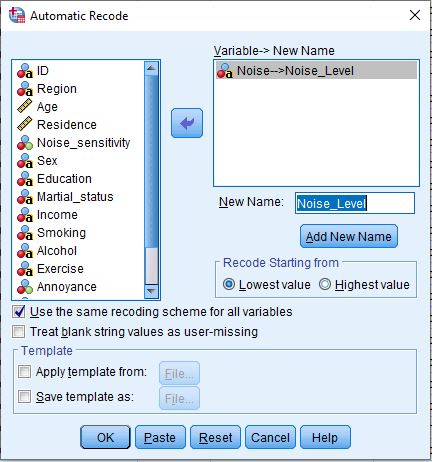

In [96]:
from IPython.display import Image
Image("Noise_Levels_&_Period_Of_Residence_Recode.JPG")

The output after recoding

The value 1 is pegged to the string '55~65', value 2 pegged to 'over 65' and value 3 pegged to 'under 55'. These strings represent the noise exposure level. 

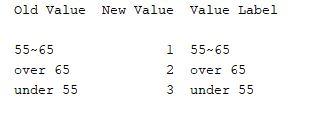

In [97]:
from IPython.display import Image
Image("Noise_Levels_&_Period_Of_Residence_Recode_2.JPG")

Because the noise columns have 3 categorical groups, the ANOVA (Analysis of Variance) Test is adopted instead of the independent samples t-test

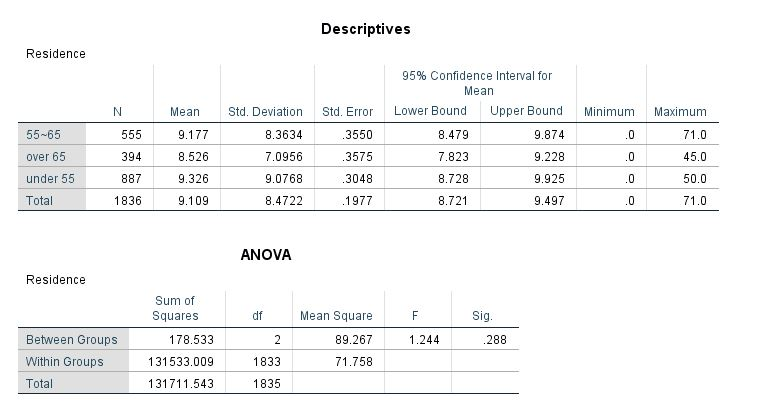

In [98]:
from IPython.display import Image
Image("Noise_Levels_&_Period_Of_Residence_ANOVA_Descriptives.JPG")

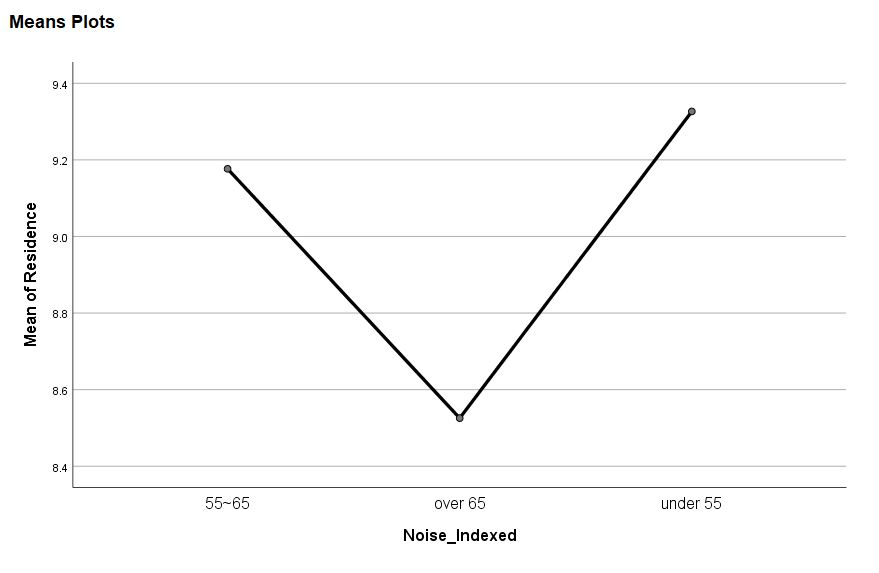

In [99]:
from IPython.display import Image
Image("Noise_Levels_&_Period_Of_Residence_ANOVA_Output.JPG")

*2.2 Results* 

Null hypothesis: There are no difference in annoyance levels between females and males

Alternative hypothesis: There are difference in annoyance levels between females and males

Because there are over 3 categorical groups (under 55, 55~65, over 65), the ANOVA (Analysis of Variance) test is employed to understand and compare the difference between the groups. 

The predetermined alpha for this test is 0.05

From the means plot above, we can infer that to a certain extent, the period of residence for a resident depends on the exposure of noise levels. From the graph, we can infer that with increasing exposure to noise levels, the period of which the resident resides decreases which made sense logically. 

However, from the descriptive analysis table shown above, we can observe that the p value of the test returns 0.288 which is > the predetermined alpha of 0.05. Therefore, we cannot reject the null hypothesis.

------------------------------------------

The average period of residence with noise exposure of < 55 dBA was 9.33 (SD = 9.077)

The average period of residence with noise exposure between 55 and 65 dBA was 9.18 (SD = 8.363)

The average period of residence with noise exposure of > 65 dBA was 8.53 (SD = 7.096)

There were no significant effect for period of residence with differing noise levels at the p > 0.05 level for the three conditions [F(2, 1833) = 1.244, p = 0.288]

## Noise Levels and Noise Annoyance

Null hypothesis: There are no differences in annoyance levels at different noise levels

Alternative hypothesis: There are differences in annoyance levels at different noise levels

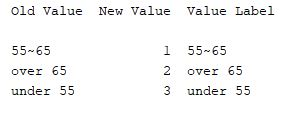

In [100]:
from IPython.display import Image
Image("Noise_Levels_&_Annoyance_Recode.JPG")

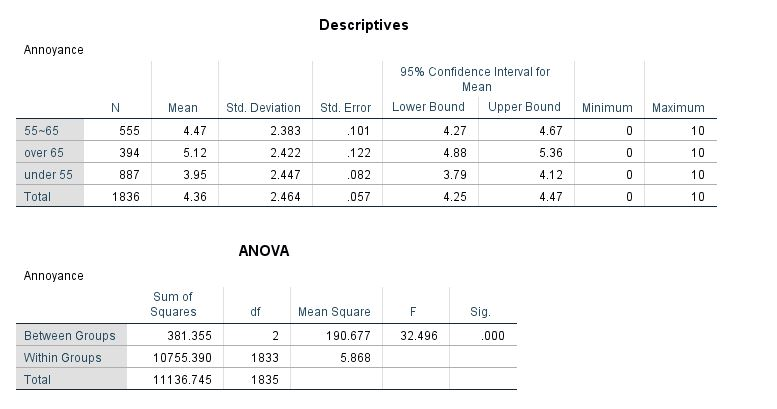

In [101]:
from IPython.display import Image
Image("Noise_Levels_&_Annoyance_ANOVA_Descriptives.JPG")

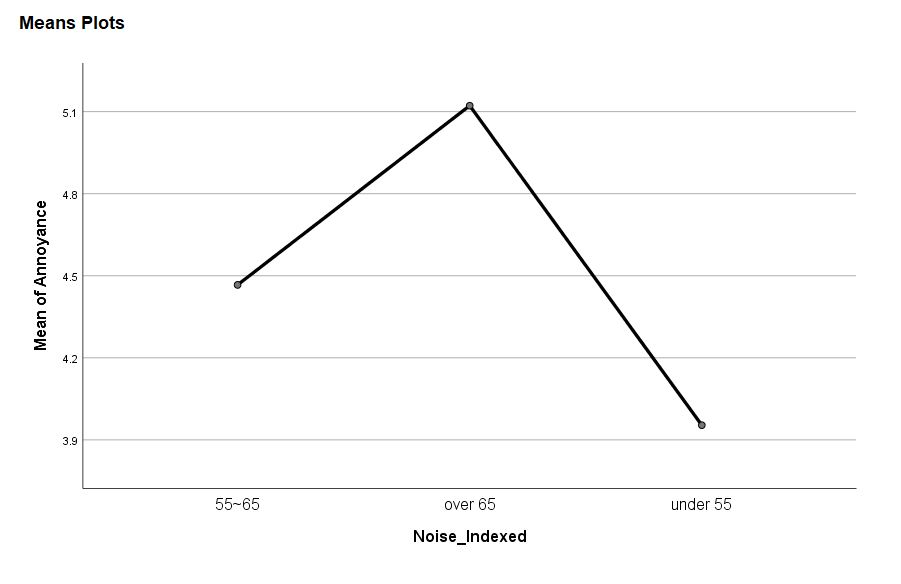

In [102]:
from IPython.display import Image
Image("Noise_Levels_&_Annoyance_ANOVA_Output.JPG")

*2.3 Results* 

------------------------------------------

The average annoyance level with noise exposure of < 55 dBA was 3.95 (SD = 2.477)

The average period of residence with noise exposure between 55 and 65 dBA was 4.47 (SD = 2.383)

The average period of residence with noise exposure of > 65 dBA was 5.12 (SD = 2.422)

There were significant effect for noise annoyance levels with differing noise levels at the p > 0.05 level for the three conditions [F(2, 1833) = 32.50, p < 0.05]

Since the p < 0.05, we can thus reject the null hypothesis and accept the alternative hypothesis. 

## Noise Annoyance and Income

Null hypothesis: There are no differences in annoyance levels for different income groups. 

Alternative hypothesis: There are differences in annoyance levels for different income groups. 

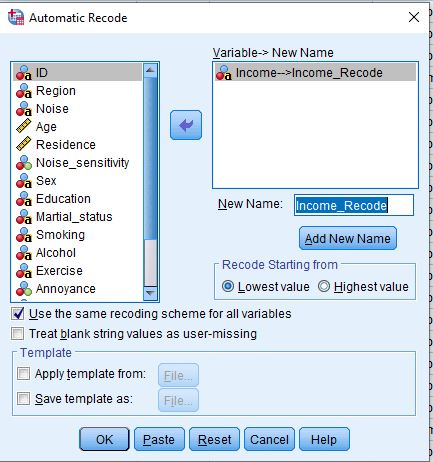

In [103]:
from IPython.display import Image
Image("Income_Annoyance_Recode.JPG")

Result from recoding






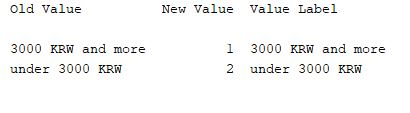

In [104]:
from IPython.display import Image
Image("Income_Annoyance_Recode_2.JPG")

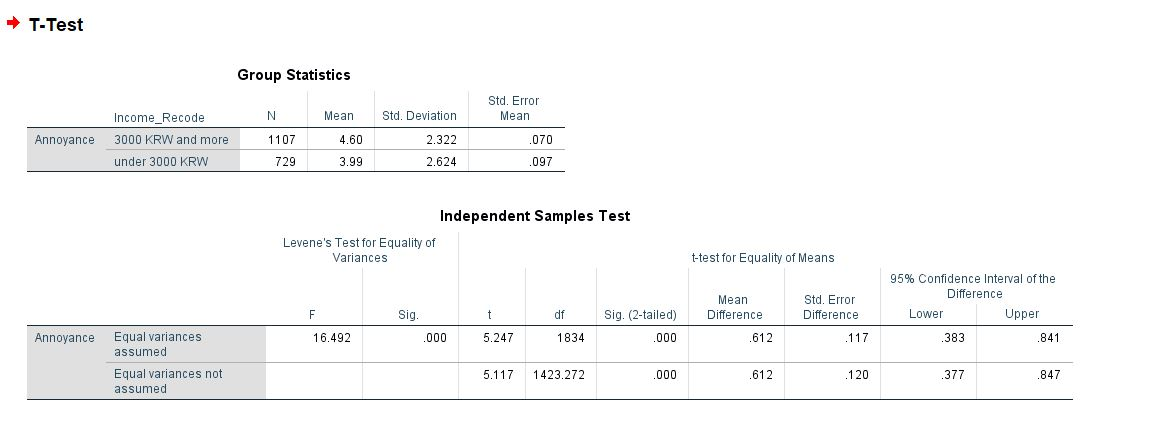

In [105]:
from IPython.display import Image
Image("Income_Annoyance_T_Test_Descriptives.JPG")



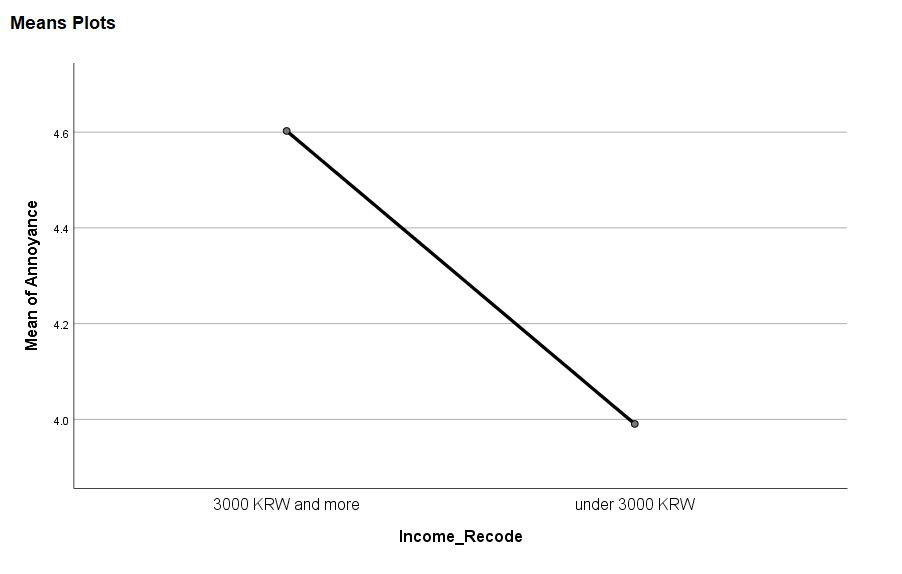

In [106]:
# displays noise annoyance vs noise sensitivity 
from IPython.display import Image
Image("Income_Annoyance_T_Test_Output.JPG")

*2.4 Results*

For comparing a categorical data (income) with a discrete data (annoyance levels), a two-way ANOVA test is adopted. 

The returned p value after conducting the independent samples t-test returns (p < 0.01) which means that the null hypothesis can be rejected. 

------------------------------------------

The average annoyance level for those earning 3000 KRW or more was 4.60 (SD = 2.322)

The average annoyance level for those earning less than 3000 KRW was 3.99 (SD = 2.624)

There was a significant effect for annoyance level with income: t(1834) = 5.17, p < 0.05, with those earning 3000 KRW or more are more annoyed than those earning 3000 KRW or less. 

##Correlation between Age and Noise Annoyance**

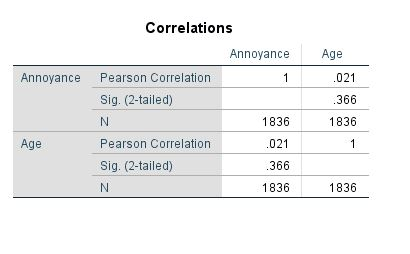

In [107]:
# displays noise annoyance vs age (Pearson Correlation)
from IPython.display import Image
Image("Age_vs_Noise_Annoyance_Pearson_Correlation.JPG")

##Correlation between Noise Sensitivity and Noise Annoyance**



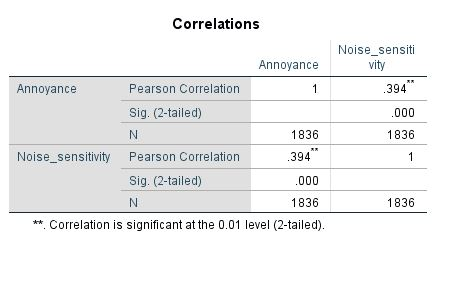

In [108]:
# displays noise annoyance vs age (Pearson Correlation)
from IPython.display import Image
Image("NoiseAnnoyance_NoiseSensitivity_Pearson_Correlation.JPG")

# Factor 3: Environment    
Situational Factors

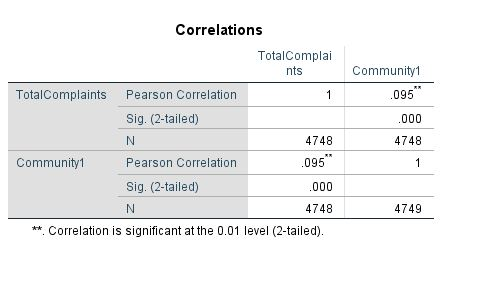

In [109]:
# displays Total Complaints vs Community Location (Pearson Correlation)
from IPython.display import Image
Image("Total_Complaints_Community_Location_Pearson_Correlation.JPG")

**Initial Idea: Using Geopandas for Community Location and Complaints Analysis**

*CRS*: Coordinate Reference Systems provide a standardized way of describing locations. Many different CRS are used to describe geographic data. The CRS that is chosen depends on when the data was collected, the geographic extent of the data, the purpose of the data, etc. 

*EPSG*: A particular CRS can be referenced by its EPSG code (i.e., epsg:4121). The EPSG is a structured dataset of CRS and Coordinate Transformations. 



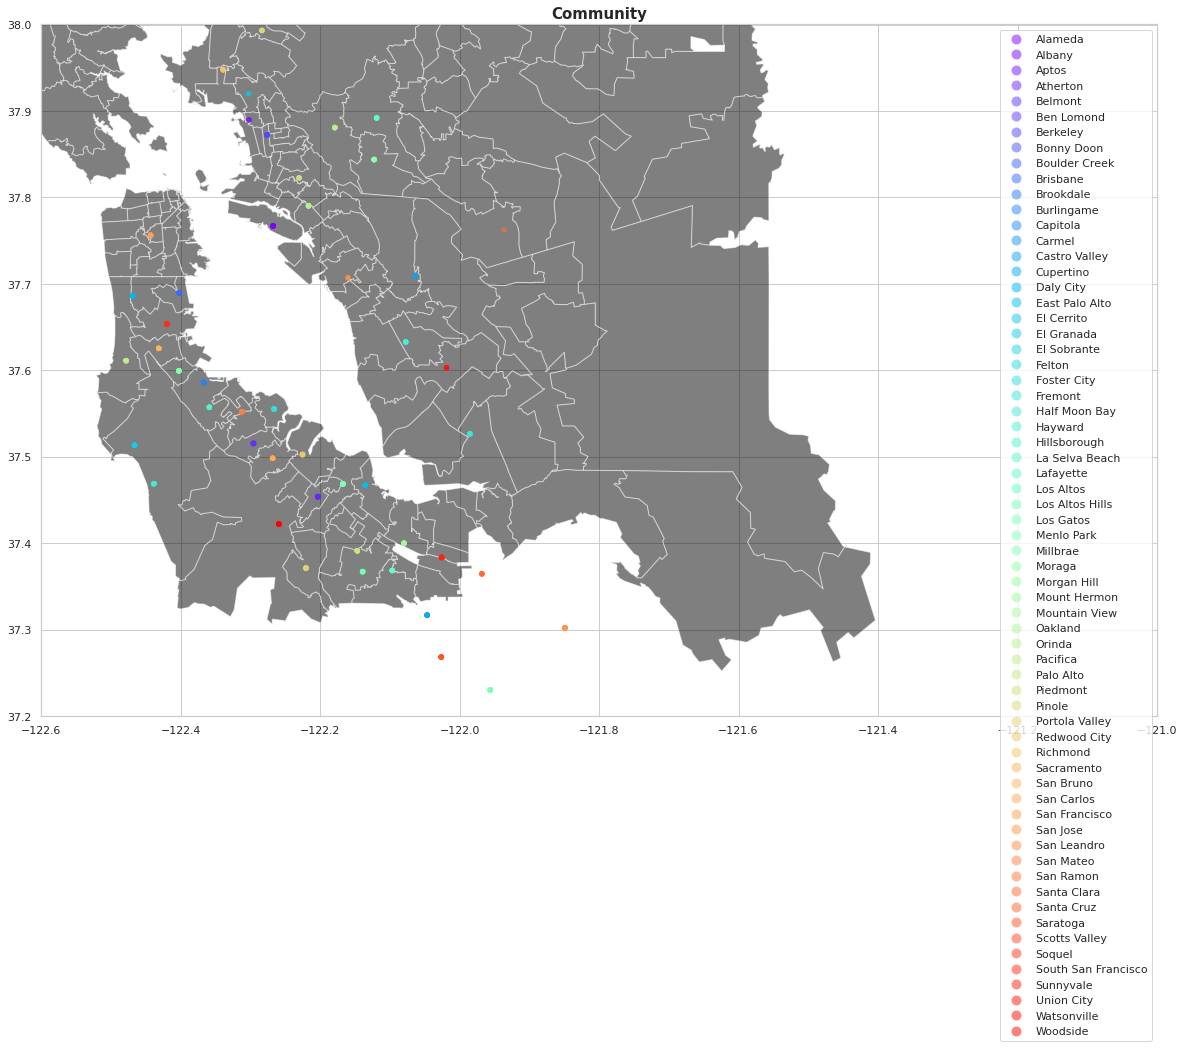

(-122.6, -121.0, 37.2, 38.0)

In [110]:
# Projecting it onto a map 
df = pd.read_csv('SFO_2018_Updated_Cities_List.csv')
crs='EPSG:4326'

# San Jose region is cut off 
street_map = gpd.read_file('geo_export_f58b9875-38c7-4055-be2b-399063cf3fc6.shp')
# San Jose region seen but not districts not clear
#street_map = gpd.read_file('geo_export_d2928eb6-b3db-43e0-9de7-272a1e34d126.shp')
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

# this is to reset the background back to be something visible 
sns.set(style="whitegrid", palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(20, 15))


# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.5, color='black')

# add geodataframe to axes
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(ax=ax, column='Community', cmap='rainbow', alpha = 0.5, 
            legend=True, markersize=20)

# add title to graph
plt.title('Community', fontsize=15, fontweight = 'bold')

# set latitiude and longitude boundaries for map display
plt.xlim(-122.6, -121)
plt.ylim( 37.2, 38)

# show map
plt.show()

# displays the axis 
ax.axis()

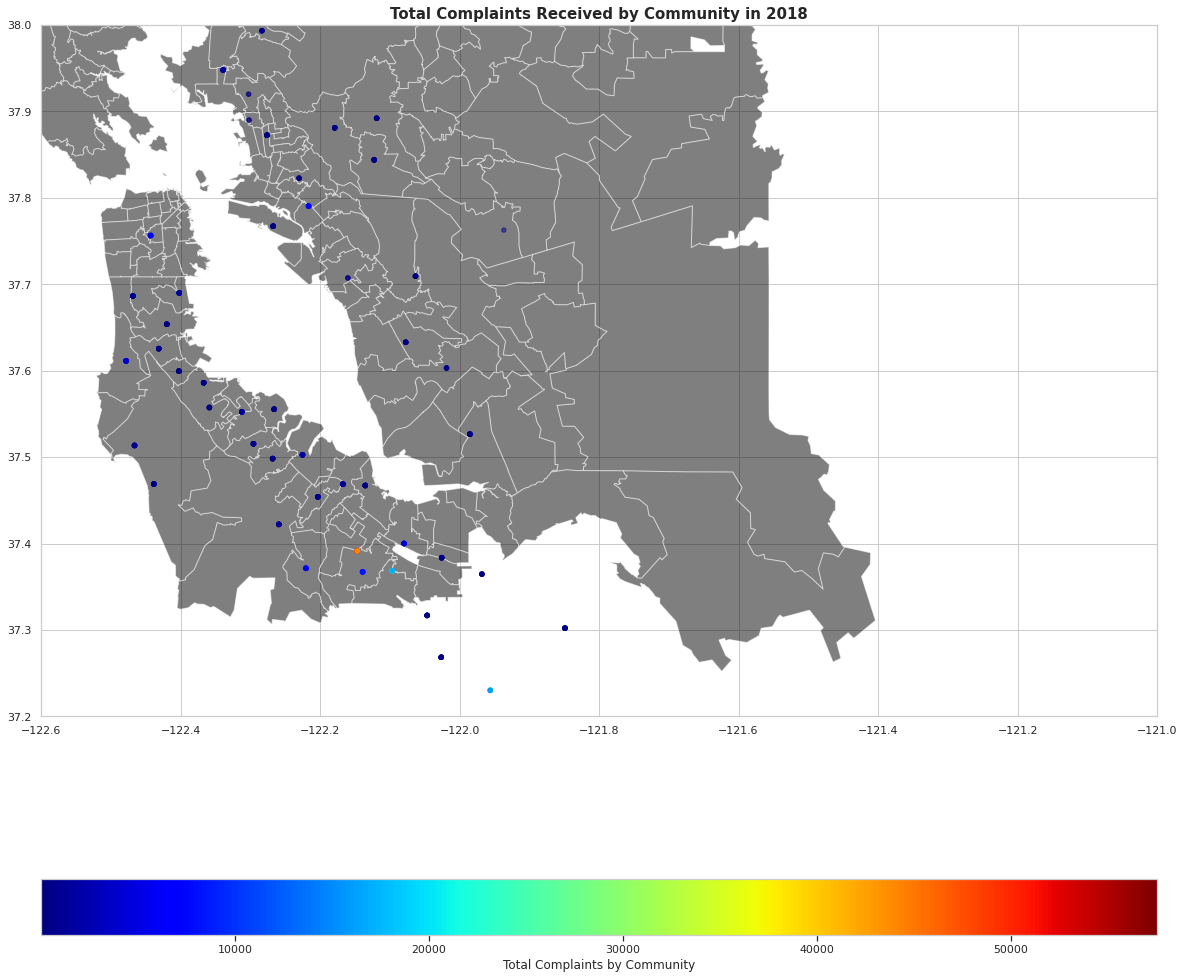

(-122.6, -121.0, 37.2, 38.0)

In [111]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20))

# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.5, color='black')

# add geodataframe to axes
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
# legend_kwds is to reorientate the cmap thingy to horizontal insteade of vertical 
geo_df.plot(ax=ax, column='Total Complaints', cmap='jet', 
            alpha = 0.5, markersize=20, legend=True,
            legend_kwds={'label': "Total Complaints by Community", 'orientation': "horizontal"})
            

# add title to graph
plt.title('Total Complaints Received by Community in 2018', fontsize=15, fontweight = 'bold')

# set latitiude and longitude boundaries for map display
plt.xlim(-122.6, -121)
plt.ylim( 37.2, 38)

# show map
test1 = plt.show()

# displays the axis 
ax.axis()

# the displayed value on the map represents the mean of the total complaints received from each community
# for the entirety of 2018

**Emulating the Different Approach Flight Paths to SFO**  
The goal of this is to emulate the different approach paths back to SFO. These flight paths has been given the terms BEDGA WEST, BEDGA EAST, DYAMD, PIRAT and SERFR respectively

**Using Folium For Community Location and Complaints Analysis**

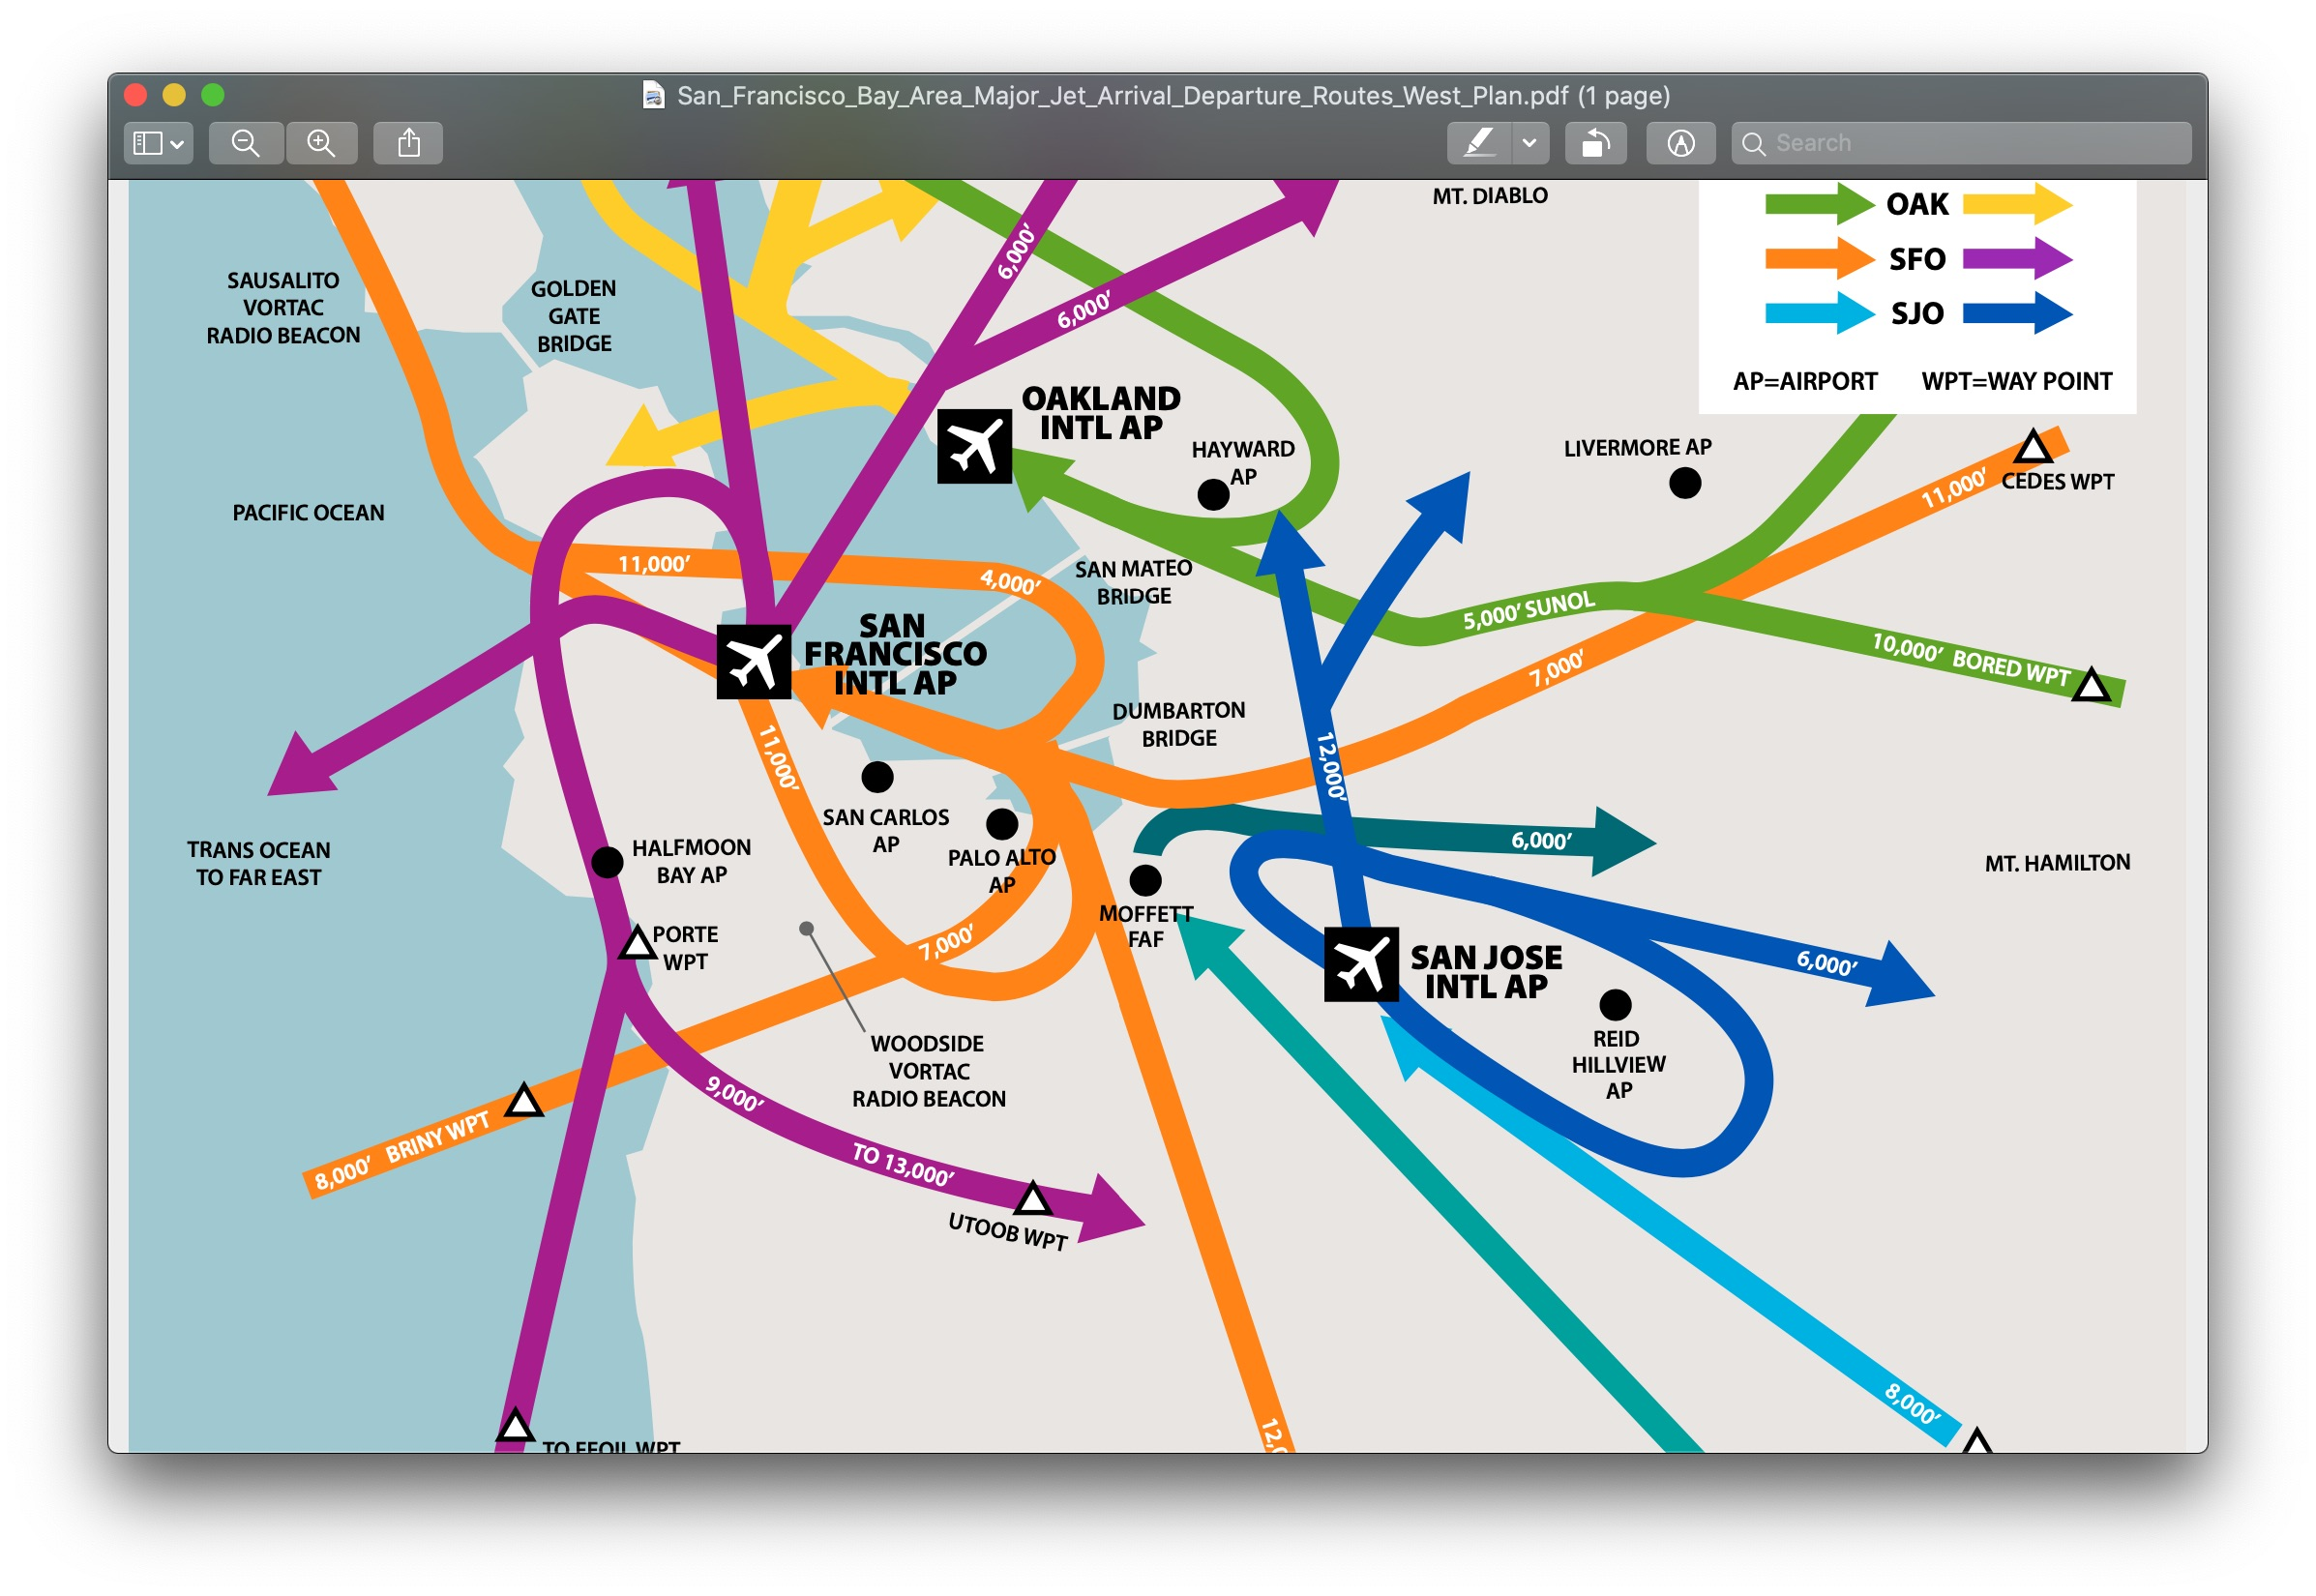

In [112]:
# A graphical representation of the SFO's west plan
from IPython.display import Image
Image("SFO_West_Plan.jpg")

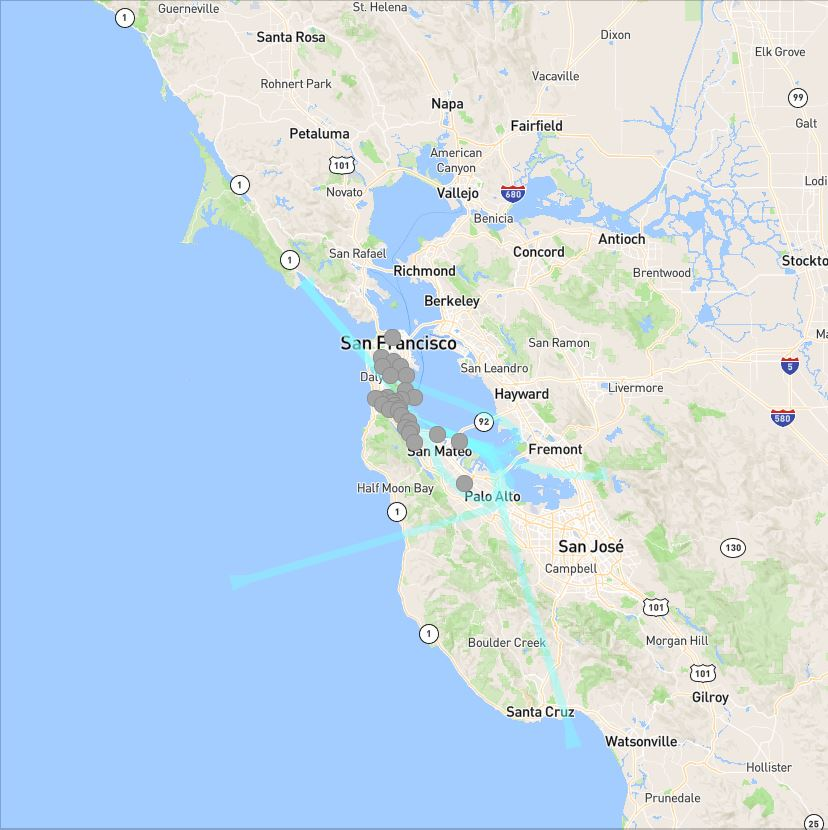

In [113]:
# ideal flight path that I'm trying to emulate manually 
from IPython.display import Image
Image("Capture_Arrival.JPG")

**Correlating the Approach Flight Path with the Community Location**.  

The objective of this is to understand and look for any causal relationships between the approach flight path undertaken by the aircraft with the location of the community. In simpler terms, the hypothesis here would be should a resident be residing under a predetermined flight path that has been set out by the Air Traffic Controller, he/ she might be more annoyed and more likely to lodge a complaint than those that are not residing under any predetermined flight paths 

**Analysis Constraints**  



*   The community locations are just aggregate locations. Exact locations or origins of the complaints are not given in the dataset 
*   The approach flight paths are ideal. They are in no way exact representations of the flight paths undertaken by aircraft (i.e. during inclement weather or conditions, they might divert away from the ideal flight path) 



**Dataset Used**   


In [114]:
df = pd.read_csv('SFO_2018_Updated_Cities_List.csv')
df.head(10)

,Year,Month,Date,Community,Total Complaints,Total Number of Callers,lat,lng
0,2018,1,Jan-18,Alameda,3,2,37.7670,-122.2673
1,2018,1,Jan-18,Aptos,966,13,36.9912,-121.8934
2,2018,1,Jan-18,Atherton,511,8,37.4539,-122.2032
3,2018,1,Jan-18,Belmont,911,7,37.5154,-122.2955
4,2018,1,Jan-18,Ben Lomond,165,4,37.0782,-122.0882
5,2018,1,Jan-18,Berkeley,78,5,37.8723,-122.2760
6,2018,1,Jan-18,Bonny Doon,75,2,37.0435,-122.1369
7,2018,1,Jan-18,Boulder Creek,168,5,37.1341,-122.1271
8,2018,1,Jan-18,Brisbane,3595,38,37.6898,-122.4019
9,2018,1,Jan-18,Brookdale,4,1,37.1058,-122.1106


**bold text**

In [115]:
# this represents the ideal flight path that I tried to emulate manually by plotting the coordinates 
# using Google maps

import folium

df = pd.read_csv('SFO_2018_Updated_Cities_List.csv') # San Fran noise complaint dataset 
crs='EPSG:4326'

# this is to extract the longitudes and latitutes of the respective communities from the dataset
# need to find out more what this does 
locations = df[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

# defining the starting point of the map to focus at: 37.6213, -122.3790
# for zoom_start, the smaller the number = the more zoomed out the map would be upon initialisation
# for black & white, include tiles='Stamen Toner' in folium.map()
m_arrival = folium.Map(location=[37.6213, -122.3790], zoom_start=10)

# this converts the numpy.int64 object to string for projection on map 
df['Total Complaints'] = df['Total Complaints'].astype(str)

# this is so that whenever the user clicks on the markers, a pop up of the community name will be shown
for point in range(0, len(locationlist)):
    # this prints out community name on the popup
    folium.Marker(locationlist[point], popup=df['Community'][point]).add_to(m_arrival)
    #folium.Marker(locationlist[point], popup=df['Total Complaints'][point]).add_to(m_arrival)

# manually plotting the route via Google maps 
# limitation: might not be as accurate 
# source: https://webtrak.emsbk.com/sfo13 for live tracking
# 37.619482, -122.374091 = SFO's coordinates

BDEGA_West = [
    [37.619482, -122.374091],
    [37.578053, -122.257887],
    [37.463967, -122.130771],
    [37.442708, -122.143045],
    [37.434121, -122.201066],
    [37.479500, -122.271993],
    [37.560976, -122.325788],
    [37.650419, -122.413028],
    [37.684926, -122.470768],
    [37.907145, -122.684902]]

BDEGA_East = [
    [37.619482, -122.374091],
    [37.578053, -122.257887],
    [37.538914, -122.116235],
    [37.573223, -122.095648],
    [37.617255, -122.152977],
    [37.686331, -122.471108]]

DYAMD = [
    [37.619482, -122.374091],
    [37.578053, -122.257887],
    [37.501517, -122.125362],
    [37.482861, -121.935593],
    [37.496110, -121.864124]]

PIRAT = [
    [37.619482, -122.374091],
    [37.578053, -122.257887],
    [37.502617, -122.123232],
    [37.460962, -122.114924],
    [37.437205, -122.136995],
    [37.417419, -122.173112],
    [37.407391, -122.190796],
    [37.392234, -122.242471],
    [37.342282, -122.394645],
    [37.303134, -122.652752]]

SERFR = [
    [37.619482, -122.374091],
    [37.578053, -122.257887],
    [37.492414, -122.164862],
    [37.435894, -122.135190],
    [37.412039, -122.136690],
    [37.385073, -122.114169],
    [37.348911, -122.103736],
    [37.242240, -122.067539],
    [37.073070, -121.989979],
    [36.984001, -121.973685],
    [36.920173, -121.965795]]

# Create the map and add the line
# first location will be the starting point 
my_PolyLine=folium.PolyLine(locations=BDEGA_West, weight = 30)
my_PolyLine2=folium.PolyLine(locations=BDEGA_East, weight = 30)
my_PolyLine3=folium.PolyLine(locations=DYAMD, weight = 30)
my_PolyLine4=folium.PolyLine(locations=PIRAT, weight = 30)
my_PolyLine5=folium.PolyLine(locations=SERFR, weight = 30)


m_arrival.add_child(my_PolyLine)
m_arrival.add_child(my_PolyLine2)
m_arrival.add_child(my_PolyLine3)
m_arrival.add_child(my_PolyLine4)
m_arrival.add_child(my_PolyLine5)

# display the map
m_arrival

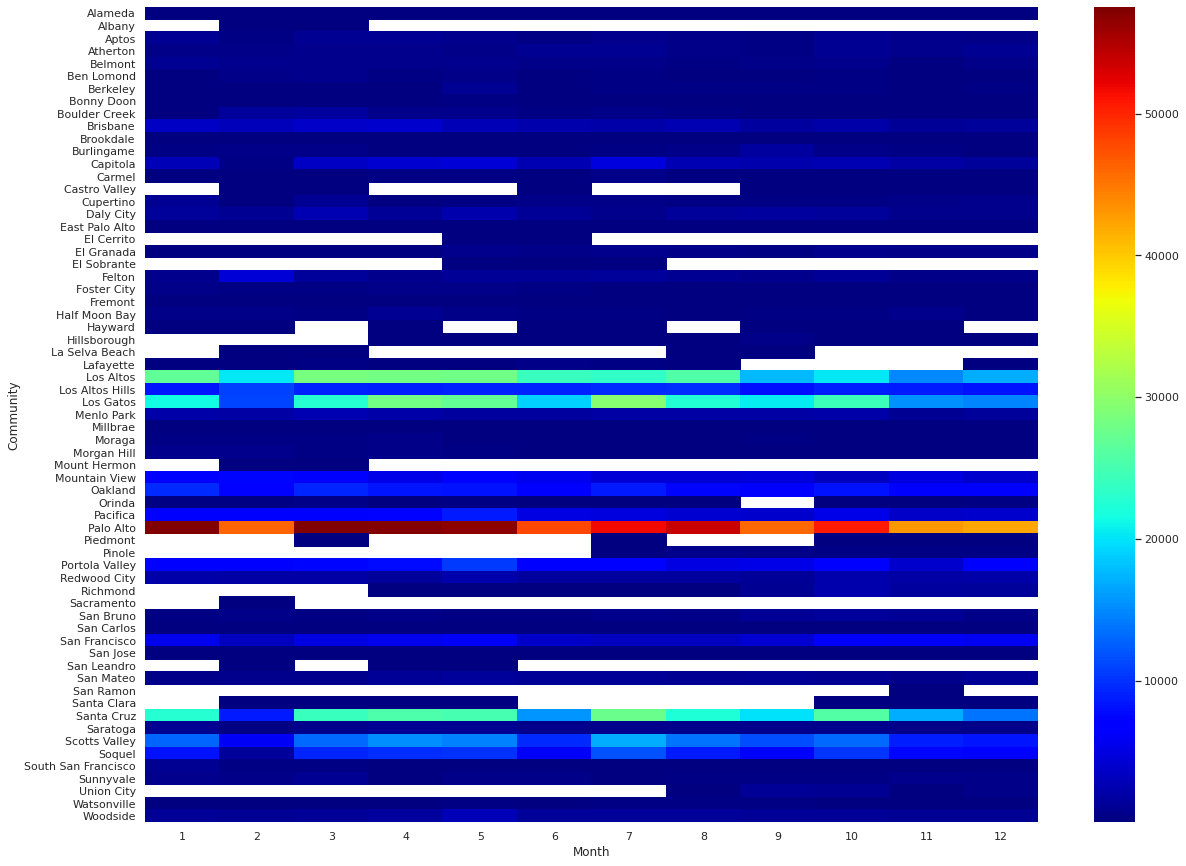

In [116]:
# this line basically selects the necessary categories 
df_heat = pd.read_csv('SFO_2018_Updated_Cities_List.csv')[['Month', 'Community', 'Total Complaints']]

# plotting the heatmap 
heatmap1_data = pd.pivot_table(df_heat, values='Total Complaints', 
                               index=['Community'], 
                               columns='Month')

# "jet" is just selecting a particular colormap package (theme)
sns_plot = sns.heatmap(heatmap1_data, cmap = "jet")

In [117]:
# to download an image of the heat map
sns_plot=sns_plot.get_figure()
from google.colab import files
sns_plot.savefig("abc.png")
files.download("abc.png") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
# I want to sort the data from the highest to the lowest number of complaints 
# based on each community
# This is to support my graphical heatmap 

# This line transforms the data to according to each month
# More explanation - refer to Google 

# This is a way to filter it by each month i.e. january = 1, february = 2 etc. 
df_heat['Month'] = df_heat[(df_heat['Month']==1)]

# because of the earlier finding that the correlation between the month and total complaints lodged
# is not statistically significant, therefore we just take January as an example to illustrate 
# The max complaint generated 
df_heat['max'] = df_heat.groupby('Month')['Total Complaints'].transform('max')

# Printing the top 40 values based on a descending order 
df_heat = df_heat.sort_values(['max', "Total Complaints"], ascending=False).drop('max', axis=1)
print(df_heat.head(30))

   Month            Community  Total Complaints
34     1            Palo Alto             57543
23     1            Los Altos             26840
42     1           Santa Cruz             22743
25     1            Los Gatos             21395
44     1        Scotts Valley             12824
31     1              Oakland              9621
24     1      Los Altos Hills              8471
45     1               Soquel              8291
33     1             Pacifica              7047
30     1        Mountain View              7031
35     1       Portola Valley              6905
39     1        San Francisco              5408
8      1             Brisbane              3595
11     1             Capitola              2762
36     1         Redwood City              2188
26     1           Menlo Park              2061
14     1            Daly City              1485
49     1             Woodside              1305
43     1             Saratoga              1045
1      1                Aptos           

**Excerpts From Respective Communities**. 

Source: https://www.mv-voice.com/news/2017/07/30/faa-report-looks-to-change-noisy-sfo-arrivals-path 

Thousands of residents, particularly in Palo Alto where three flight paths cross, were in an uproar after the FAA implemented NextGen, a program it launched in 2015 designed to overhaul the air-traffic system and free up airspace by putting planes in narrow corridors. That system has created increased noise levels by lowering altitudes, putting planes in a narrower travel band and increasing the frequency of aircraft flying over specific areas.

Of particular concern, NextGen moved the flight path of planes arriving from the south at SFO more to the east, putting aircraft over some coastal residents in the Santa Cruz area who had not previously been in the flight path. The previous flight path, called Big Sur, was replaced with SERFR, which put more and lower air traffic over Palo Alto.

**On the Issue of Noise Measurement**  

Source: https://www.mv-voice.com/news/2017/07/30/faa-report-looks-to-change-noisy-sfo-arrivals-path

The Select Committee has recommended noise-measurement modifications to more accurately consider the noise experienced by people on the ground. Noise levels are currently taken cumulatively within a 24-hour period and don't accurately measure the true impact experienced by residents.

**Residents' Sentiments on NextGen Routes**  

Source: https://www.paloaltoonline.com/news/2018/03/29/sfo-airplane-route-changes-slightly

Residents along the NextGen routes nationwide have complained about unbearable levels of noise and air traffic.

Source: https://www.mercurynews.com/2016/11/16/relief-from-sfo-aircraft-noise-may-be-en-route/

“The average altitude over Menlo waypoint had been close to 5,000 feet through 2010, but with the implementation of NextGen, they’ve been coming in at 4,000 feet,” Ohtaki said. “Probably two-thirds of flight arrivals into SFO come over (the waypoint).”



**Residents' Sentiments on Brisbane Airport Opening New Runway**  

Source: https://australianaviation.com.au/2020/08/brisbane-noise-complaints-increase-after-runways-opens/ 

“Bulimba, Balmoral and Hawthorne are all communities receiving aircraft noise as a result of the new flight paths, and this is reflected in the questions and complaints we have received since the runway opening,” the airport told The Brisbane Times.